In [ ]:
# system
import glob

# scipy
import numpy as np

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

# analysis tools
from template_lib.tools import *

%matplotlib inline
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

In [ ]:
primary  = 'proton'
rf_chain = 'rfv2'
plot_dir = '/pbs/home/p/pcorrea/grand/nutrig/plots/'
savefig  = True

In [ ]:
file_dir = '/sps/grand/pcorrea/nutrig/template/pulse_shape_analysis/{}/'.format(rf_chain)
files    = sorted( glob.glob(file_dir+'*_{}_*.npz'.format(primary)) )

sim_params_dir = '/sps/grand/pcorrea/nutrig/sim/zhaires/params/'
sim_params_tot = np.load(sim_params_dir+'sim_params_zhaires_{}.npz'.format(primary))

## Distributions of shower parameters
***NOTE***: These are the distributions AFTER the selection performed in `get_pulse_shape_params.py`, leading to a selection bias. In addition, for the same shower, if there are $n$ selected DUs, then the shower parameters will be counted $n$ times in the distributions. Need to correct for this.

In [ ]:
energy       = np.empty(1,dtype=float)
zenith       = np.empty(1,dtype=float)
azimuth      = np.empty(1,dtype=float)
omega        = np.empty(1,dtype=float)
omega_c      = np.empty(1,dtype=float)

peak_to_peak = np.empty((1,3),dtype=float)
n_peaks      = np.empty((1,3),dtype=float)
pulse_width  = np.empty((1,3),dtype=float)
peak_ratio   = np.empty((1,3),dtype=float)
peak_dist    = np.empty((1,3),dtype=float)

for file in files[:]:
    f            = np.load(file)

    energy       = np.hstack((energy,f['energy']))
    zenith       = np.hstack((zenith,f['zenith']))
    azimuth      = np.hstack((azimuth,f['azimuth']))
    omega        = np.hstack((omega,f['omega']))
    omega_c      = np.hstack((omega_c,f['omega_c']))

    peak_to_peak = np.vstack((peak_to_peak,f['peak_to_peak']))
    n_peaks      = np.vstack((n_peaks,f['n_peaks']))
    pulse_width  = np.vstack((pulse_width,f['pulse_width']))
    peak_ratio   = np.vstack((peak_ratio,f['peak_ratio']))
    peak_dist    = np.vstack((peak_dist,f['peak_dist']))

energy       = energy[1:]
zenith       = zenith[1:]
azimuth      = azimuth[1:]
omega        = omega[1:]
omega_c      = omega_c[1:]

peak_to_peak = peak_to_peak[1:]
n_peaks      = n_peaks[1:]
pulse_width  = pulse_width[1:]
peak_ratio   = peak_ratio[1:]
peak_dist    = peak_dist[1:]

In [ ]:
sim_params_sel = np.vstack((energy,zenith,azimuth))
sim_params_sel, idx, n_du_sel = np.unique(sim_params_sel,axis=1,return_index=True,return_counts=True)

# idx_max_du_count = np.argmax(n_du_sel)
# idx_max_du_count, n_du_sel[idx_max_du_count]
# print(sim_params_sel[1][idx_max_du_count])

In [ ]:
weights_energy = np.empty(energy.shape)
unique_energy, counts = np.unique(energy,return_counts=True)

for E,c in zip(unique_energy,counts):
    weights_energy[energy==E] = 1/c


weights_zenith = np.empty(zenith.shape)
unique_zenith, counts = np.unique(zenith,return_counts=True)

for theta,c in zip(unique_zenith,counts):
    weights_zenith[zenith==theta] = 1/c

In [ ]:
log_energy_bin_edges = np.linspace(7.5,9.6,43)
zenith_bin_edges     = np.linspace(30.6,87.3,43)
azimuth_bin_edges    = np.linspace(0,360,37)
omega_bin_edges      = np.linspace(0,10,101)
n_du_bin_edges       = np.linspace(0,300,61)

log_energy_bin_centers = (log_energy_bin_edges[1:] + log_energy_bin_edges[:-1])/2.
zenith_bin_centers     = (zenith_bin_edges[1:] + zenith_bin_edges[:-1])/2.
azimuth_bin_centers    = (azimuth_bin_edges[1:] + azimuth_bin_edges[:-1])/2.
omega_bin_centers      = (omega_bin_edges[1:] + omega_bin_edges[:-1])/2.
n_du_bin_centers       = (n_du_bin_edges[1:] + n_du_bin_edges[:-1])/2.

In [ ]:
colors = ['b','m','r']
labels = [r'$X$',r'$Y$',r'$Z$']
cmaps  = ['Blues','Purples','Reds']

log_p2p_bin_edges = np.linspace(0,4.2,22)
n_peaks_bin_edges = np.linspace(0,33,34)
pw_bin_edges      = np.linspace(-5,100,22)#np.linspace(-1,100,102)
pr_bin_edges      = np.linspace(-1,7.5,18)
pd_bin_edges      = np.linspace(-1,20,22)

log_p2p_bin_centers = (log_p2p_bin_edges[1:] + log_p2p_bin_edges[:-1])/2.
n_peaks_bin_centers = (n_peaks_bin_edges[1:] + n_peaks_bin_edges[:-1])/2.
pw_bin_centers      = (pw_bin_edges[1:] + pw_bin_edges[:-1])/2.
pr_bin_centers      = (pr_bin_edges[1:] + pr_bin_edges[:-1])/2.
pd_bin_centers      = (pd_bin_edges[1:] + pd_bin_edges[:-1])/2.

### Plot the distributions of shower properties

SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_energy_distribution_proton_rfv1.png


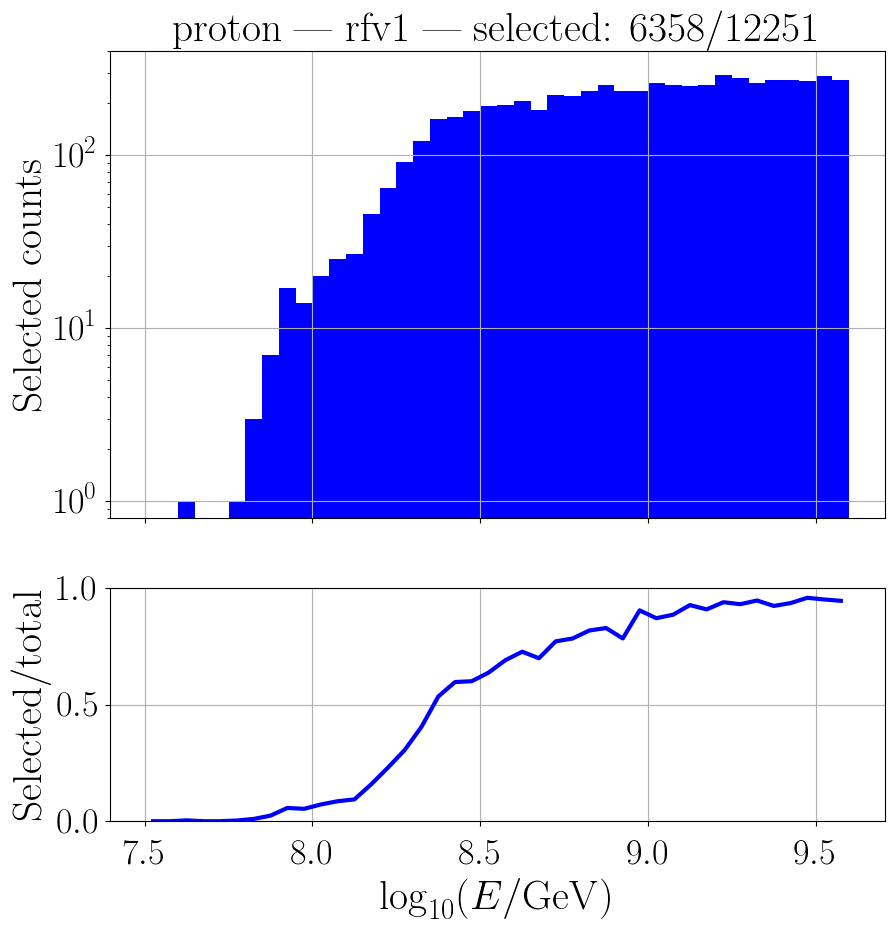

In [18]:
log_energy_hist_sel,_ = np.histogram(np.log10(sim_params_sel[0]),bins=log_energy_bin_edges)
log_energy_hist_tot,_ = np.histogram(np.log10(sim_params_tot['energy']),bins=log_energy_bin_edges)

fig, ax = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [2, 1]})
fig.set_size_inches(10,10)

ax[0].bar(log_energy_bin_centers,
          log_energy_hist_sel,
          width=log_energy_bin_centers[1]-log_energy_bin_centers[0],
          color='b')
ax[1].plot(log_energy_bin_centers,
           log_energy_hist_sel/log_energy_hist_tot,
           color='b')
  
ax[0].set_yscale('log')

ax[0].set_ylim([.8,4e2])
ax[1].set_ylim([0,1])

ax[1].set_xlabel(r'$\log_{10}(E/\mathrm{GeV})$')
ax[0].set_ylabel('Selected counts')
ax[1].set_ylabel('Selected/total')

title = '{} --- {} --- selected: {}/{}'.format(primary,rf_chain,len(sim_params_sel[0,]),len(sim_params_tot['energy']))
ax[0].set_title(title)

if savefig:
    plot_file = f'psa_energy_distribution_{primary}_{rf_chain}.png'
    plt.savefig(plot_dir+plot_file,bbox_inches='tight',dpi=150)
    print(f'SAVED: {plot_dir+plot_file}')

plt.show()

SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_zenith_distribution_proton_rfv1.png


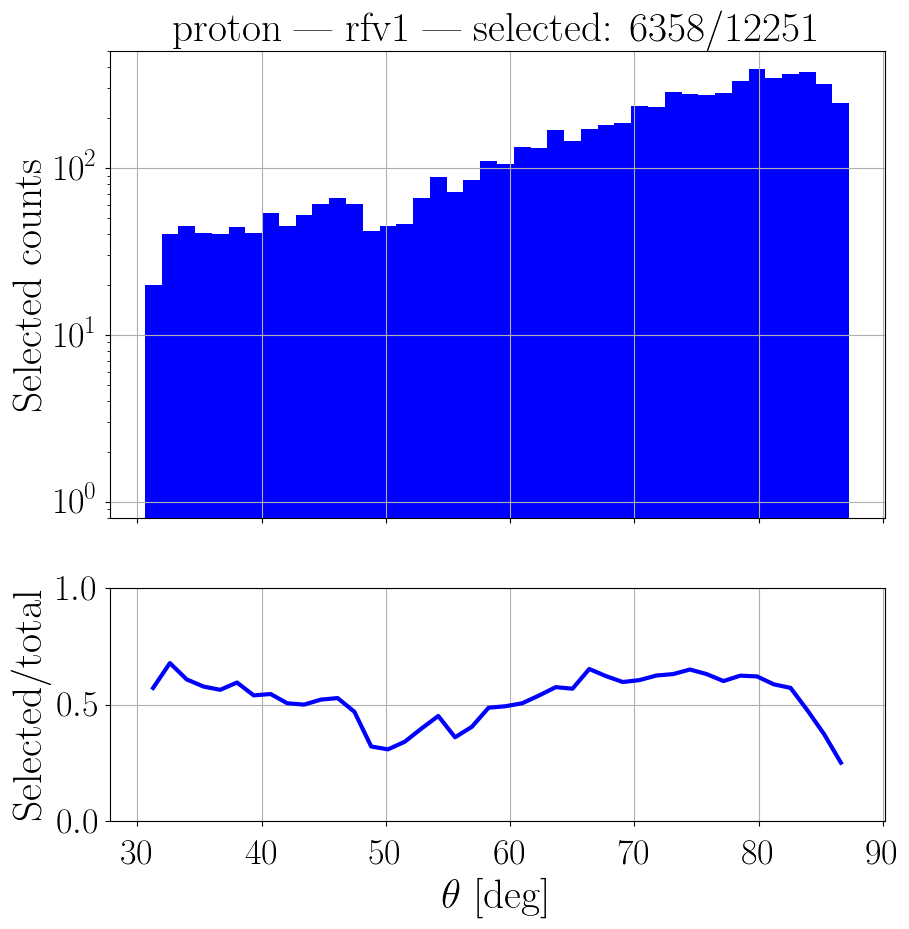

In [21]:
zenith_hist_sel,_ = np.histogram(sim_params_sel[1],bins=zenith_bin_edges)
zenith_hist_tot,_ = np.histogram(np.rad2deg(sim_params_tot['zenith']),bins=zenith_bin_edges)

fig, ax = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [2, 1]})
fig.set_size_inches(10,10)

ax[0].bar(zenith_bin_centers,
          zenith_hist_sel,
          width=zenith_bin_centers[1]-zenith_bin_centers[0],
          color='b')

ax[1].plot(zenith_bin_centers,
           zenith_hist_sel/zenith_hist_tot,
           color='b')

ax[0].set_yscale('log')

ax[0].set_ylim([.8,5e2])
ax[1].set_ylim([0,1])

ax[1].set_xlabel(r'$\theta$ [deg]')
ax[0].set_ylabel('Selected counts')
ax[1].set_ylabel('Selected/total')

title = '{} --- {} --- selected: {}/{}'.format(primary,rf_chain,len(sim_params_sel[0,]),len(sim_params_tot['zenith']))
ax[0].set_title(title)

if savefig:
    plot_file = f'psa_zenith_distribution_{primary}_{rf_chain}.png'
    plt.savefig(plot_dir+plot_file,bbox_inches='tight',dpi=150)
    print(f'SAVED: {plot_dir+plot_file}')

plt.show()

SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_azimuth_distribution_proton_rfv1.png


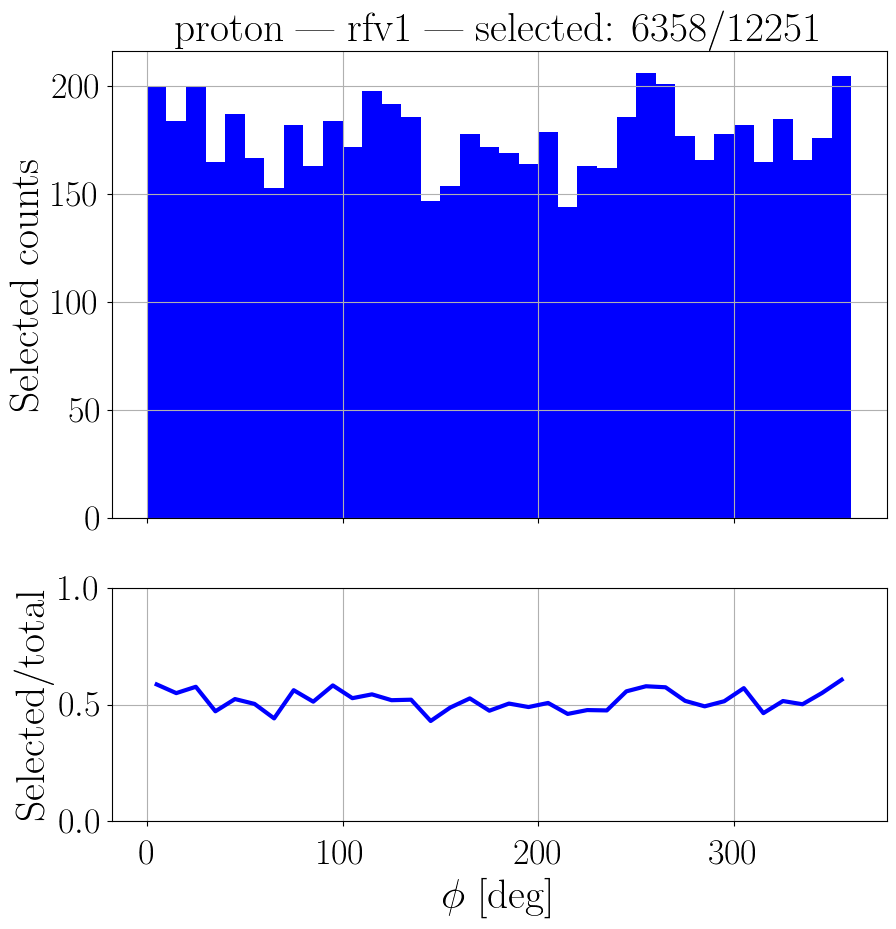

In [22]:
azimuth_hist_sel,_ = np.histogram(sim_params_sel[2],bins=azimuth_bin_edges)
azimuth_hist_tot,_ = np.histogram(np.rad2deg(sim_params_tot['azimuth']),bins=azimuth_bin_edges)

fig, ax = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [2, 1]})
fig.set_size_inches(10,10)

ax[0].bar(azimuth_bin_centers,
          azimuth_hist_sel,
          width=azimuth_bin_centers[1]-azimuth_bin_centers[0],
          color='b')

ax[1].plot(azimuth_bin_centers,
           azimuth_hist_sel/azimuth_hist_tot,
           color='b')

#ax[0].set_yscale('log')

#ax[0].set_ylim([.8,5e2])
ax[1].set_ylim([0,1])

ax[1].set_xlabel(r'$\phi$ [deg]')
ax[0].set_ylabel('Selected counts')
ax[1].set_ylabel('Selected/total')

title = '{} --- {} --- selected: {}/{}'.format(primary,rf_chain,len(sim_params_sel[0,]),len(sim_params_tot['azimuth']))
ax[0].set_title(title)

if savefig:
    plot_file = f'psa_azimuth_distribution_{primary}_{rf_chain}.png'
    plt.savefig(plot_dir+plot_file,bbox_inches='tight',dpi=150)
    print(f'SAVED: {plot_dir+plot_file}')

plt.show()

SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_omega_distribution_proton_rfv1.png


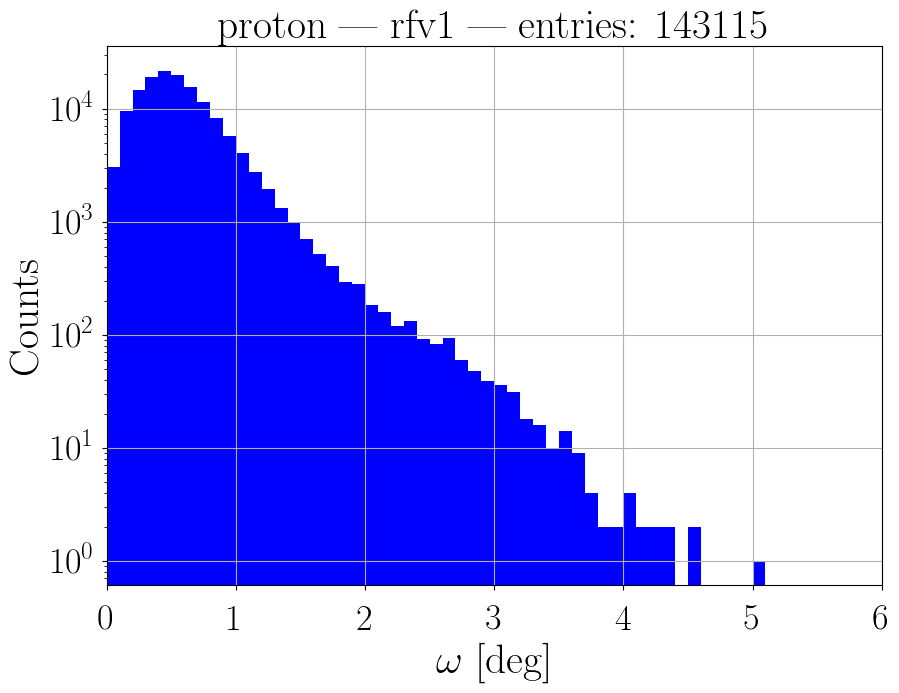

In [23]:
omega_hist, _ = np.histogram(omega,bins=omega_bin_edges)

fig, ax = plt.subplots()

ax.bar(omega_bin_centers,
       omega_hist,
       width=omega_bin_centers[1]-omega_bin_centers[0],
       color='b')

ax.set_yscale('log')

ax.set_xlim([0,6])

ax.set_xlabel(r'$\omega$ [deg]')
ax.set_ylabel('Counts')

title = '{} --- {} --- entries: {}'.format(primary,rf_chain,len(omega))
ax.set_title(title)

if savefig:
    plot_file = f'psa_omega_distribution_{primary}_{rf_chain}.png'
    plt.savefig(plot_dir+plot_file,bbox_inches='tight',dpi=150)
    print(f'SAVED: {plot_dir+plot_file}')

plt.show()

/scratch/users/p/pcorrea/ipykernel_5028/905624028.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith,


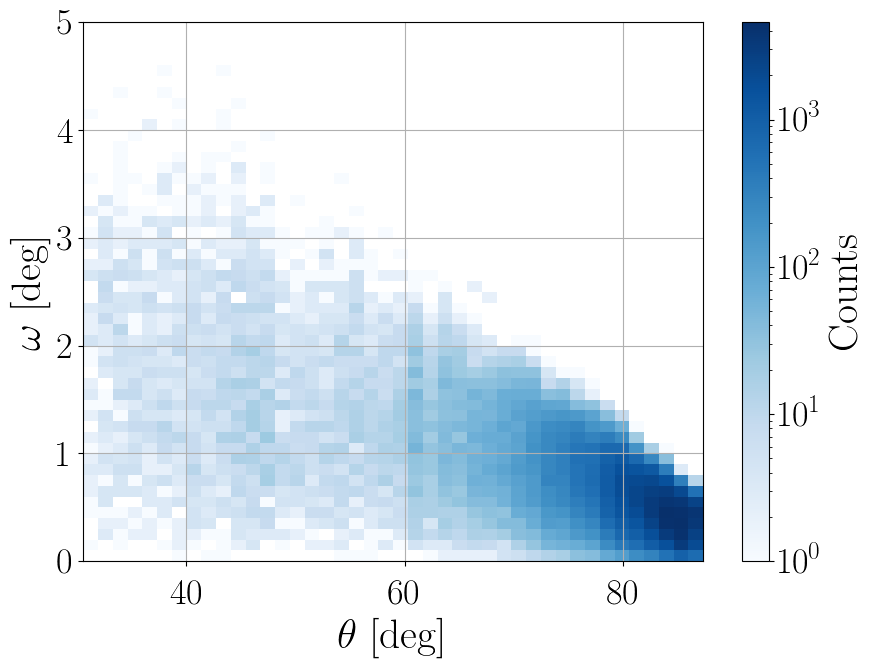

In [14]:
fig, ax = plt.subplots()

hist2d = ax.hist2d(zenith,
                   omega,
                   bins=[zenith_bin_edges,omega_bin_edges],
                   cmap='Blues',
                   norm=matplotlib.colors.LogNorm())

fig.colorbar(hist2d[3], ax=ax, label='Counts')

# ax.set_xlim([0,20])
ax.set_ylim([0,5])

ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'$\omega$ [deg]')

ax.grid(True)

plt.show()

/scratch/users/p/pcorrea/ipykernel_5028/2149225378.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith,


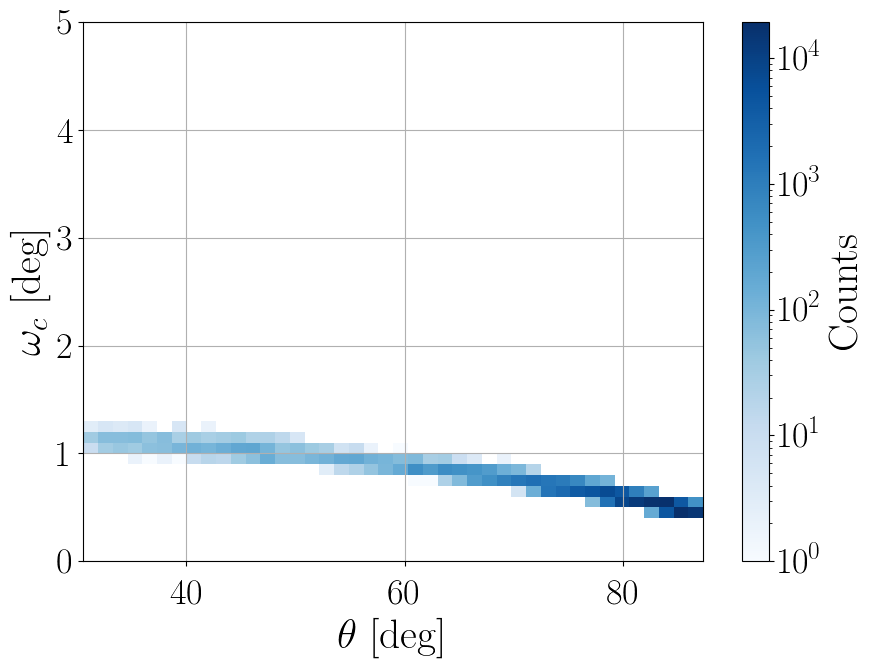

In [18]:
fig, ax = plt.subplots()

hist2d = ax.hist2d(zenith,
                   omega_c,
                   bins=[zenith_bin_edges,omega_bin_edges],
                   cmap='Blues',
                   norm=matplotlib.colors.LogNorm())

fig.colorbar(hist2d[3], ax=ax, label='Counts')

# ax.set_xlim([0,20])
ax.set_ylim([0,5])

ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'$\omega_c$ [deg]')

ax.grid(True)

plt.show()

## Distributions of pulse shape parameters

### Distributions of individual pulse shape parameters

/scratch/users/p/pcorrea/ipykernel_25359/3746035900.py:3: RuntimeWarning: divide by zero encountered in log10
  log_p2p_hist,_ = np.histogram(np.log10(p2p),bins=log_p2p_bin_edges)


SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_p2p_distribution_proton_rfv1_X.png


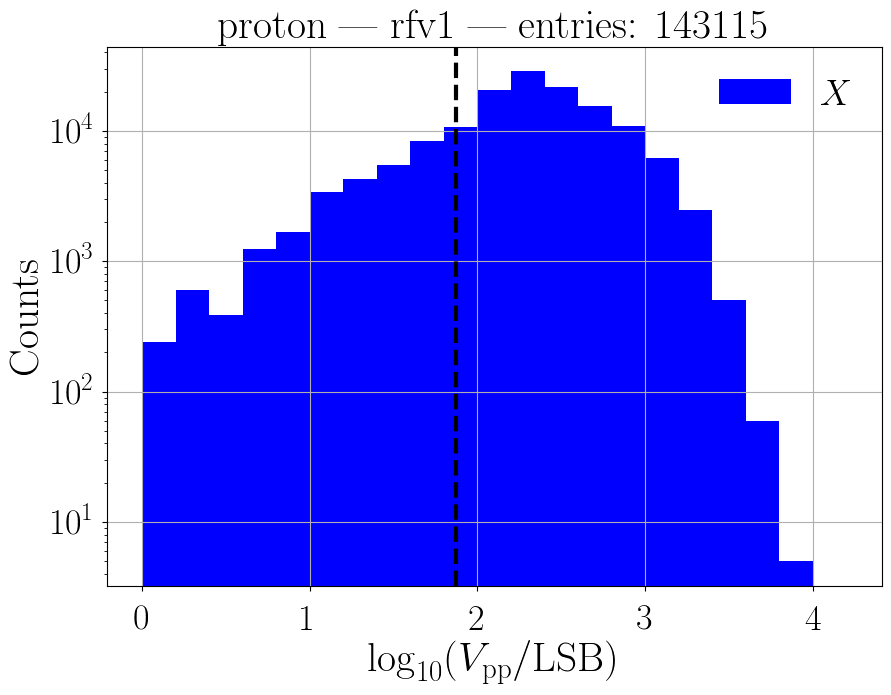

SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_p2p_distribution_proton_rfv1_Y.png


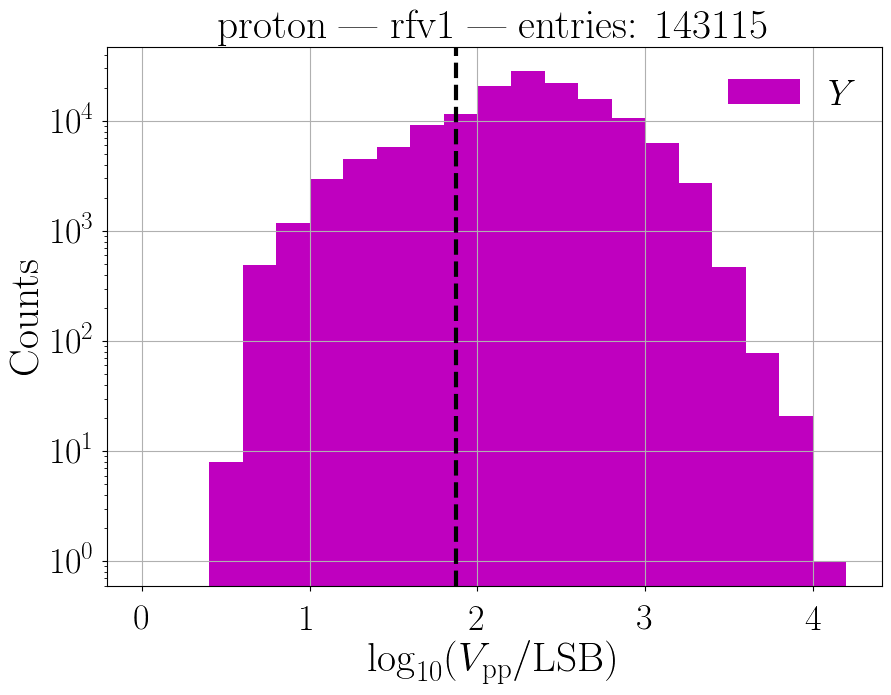

SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_p2p_distribution_proton_rfv1_Z.png


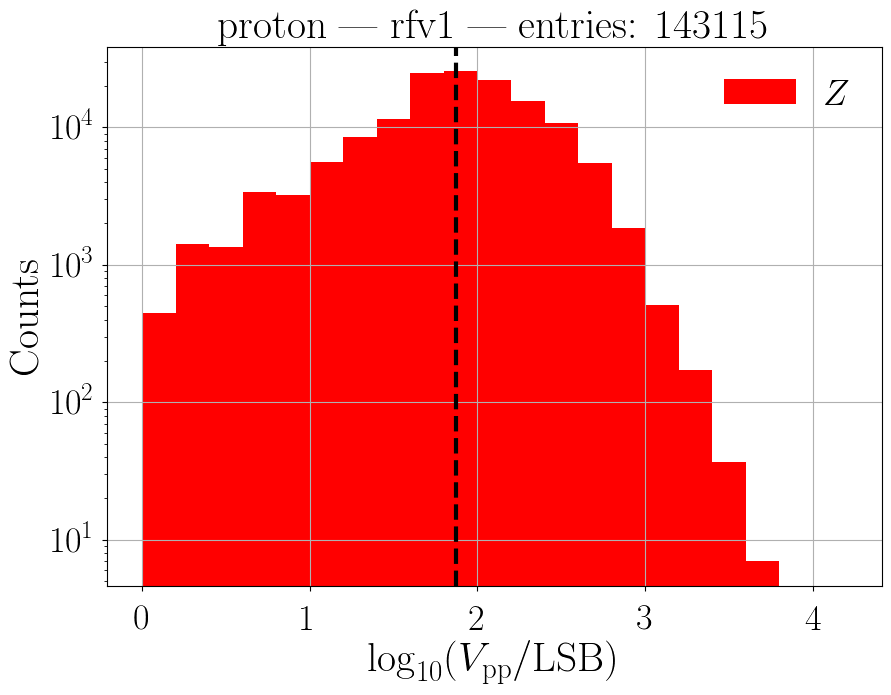

In [25]:
for p2p, color, label in zip(peak_to_peak.T,colors,labels):

       log_p2p_hist,_ = np.histogram(np.log10(p2p),bins=log_p2p_bin_edges)

       fig, ax = plt.subplots()

       ax.bar(log_p2p_bin_centers,
              log_p2p_hist,
              width=log_p2p_bin_edges[1:]-log_p2p_bin_edges[:-1],
              color=color,
              label=label)
       
       ax.axvline(np.log10(75),
                  color='k',
                  linestyle='--')

       ax.set_yscale('log')

       ax.set_xlabel(r'$\log_{10} (V_{\mathrm{pp}} / \mathrm{LSB})$')
       ax.set_ylabel('Counts')

       title = '{} --- {} --- entries: {}'.format(primary,rf_chain,len(p2p))
       ax.set_title(title)

       if savefig:
              plot_file = f'psa_p2p_distribution_{primary}_{rf_chain}_{label[1]}.png'
              plt.savefig(plot_dir+plot_file,bbox_inches='tight',dpi=150)
              print(f'SAVED: {plot_dir+plot_file}')

       ax.legend()

       plt.show()

SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_n_peak_distribution_proton_rfv1_X.png


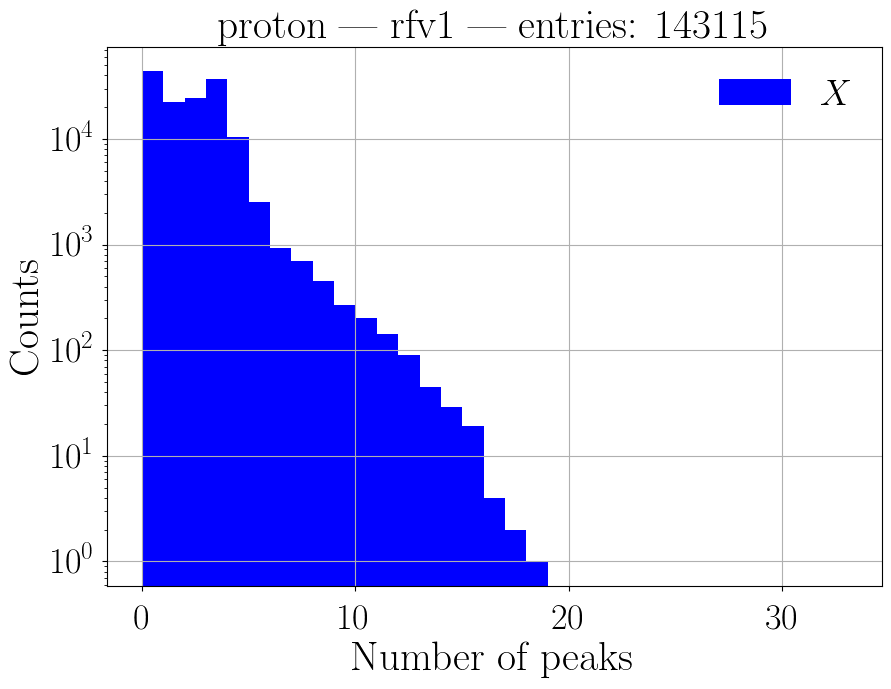

SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_n_peak_distribution_proton_rfv1_Y.png


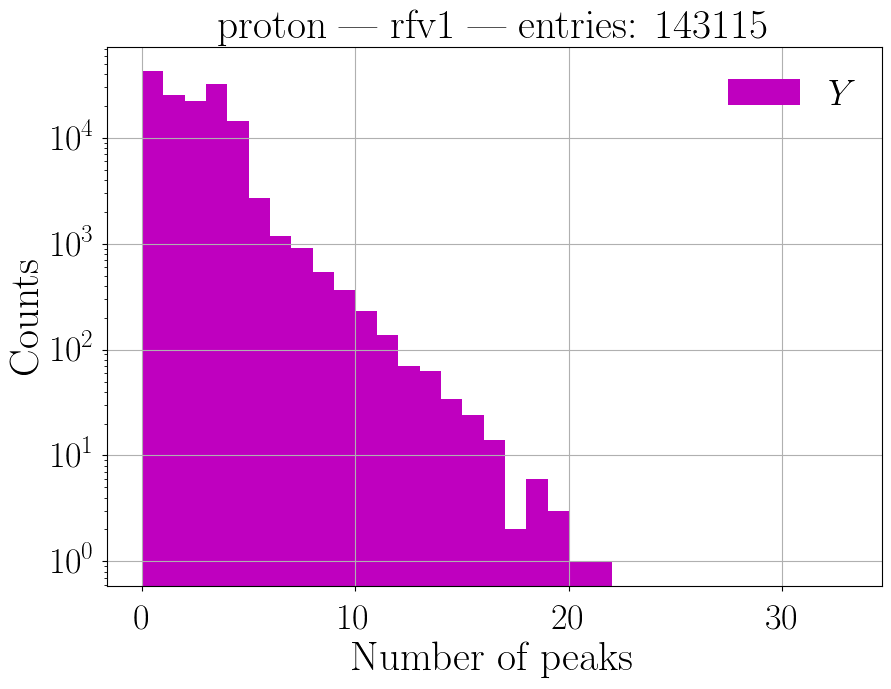

SAVED: /pbs/home/p/pcorrea/grand/nutrig/plots/psa_n_peak_distribution_proton_rfv1_Z.png


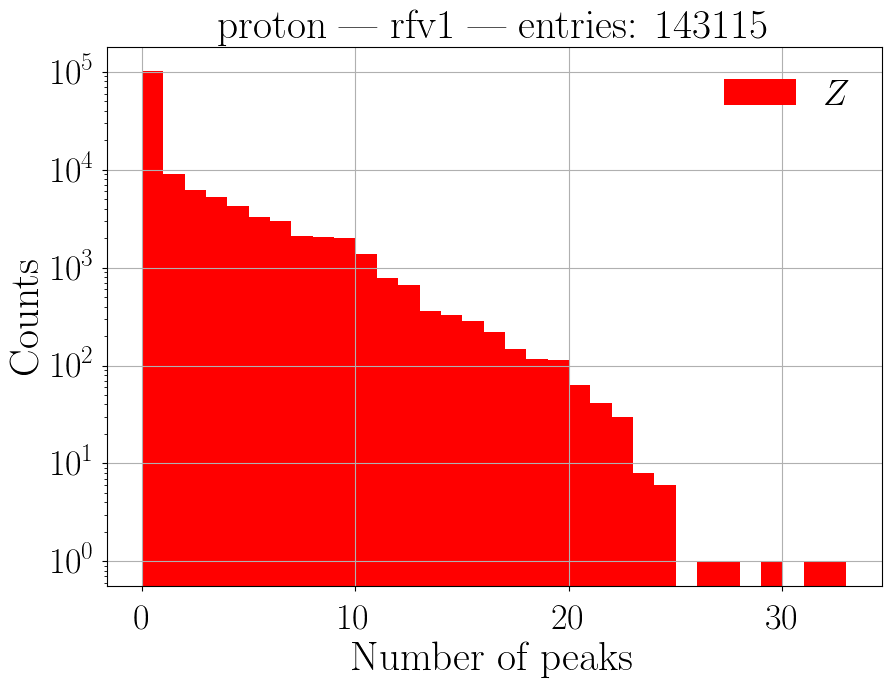

In [26]:
for n_peak, color, label in zip(n_peaks.T,colors,labels):
       n_peaks_hist,_ = np.histogram(n_peak,bins=n_peaks_bin_edges)

       fig, ax = plt.subplots()

       ax.bar(n_peaks_bin_centers,
              n_peaks_hist,
              width=n_peaks_bin_edges[1:]-n_peaks_bin_edges[:-1],
              color=color,
              label=label)

       ax.set_yscale('log')

       ax.set_xlabel('Number of peaks')
       ax.set_ylabel('Counts')

       title = '{} --- {} --- entries: {}'.format(primary,rf_chain,len(n_peak))
       ax.set_title(title)

       if savefig:
              plot_file = f'psa_n_peak_distribution_{primary}_{rf_chain}_{label[1]}.png'
              plt.savefig(plot_dir+plot_file,bbox_inches='tight',dpi=150)
              print(f'SAVED: {plot_dir+plot_file}')

       ax.legend()

       plt.show()

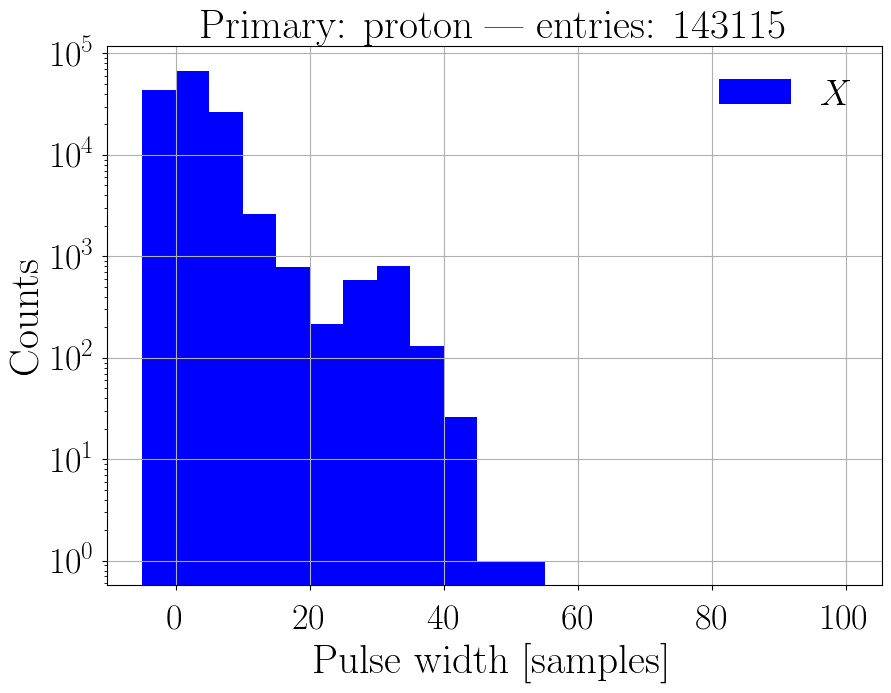

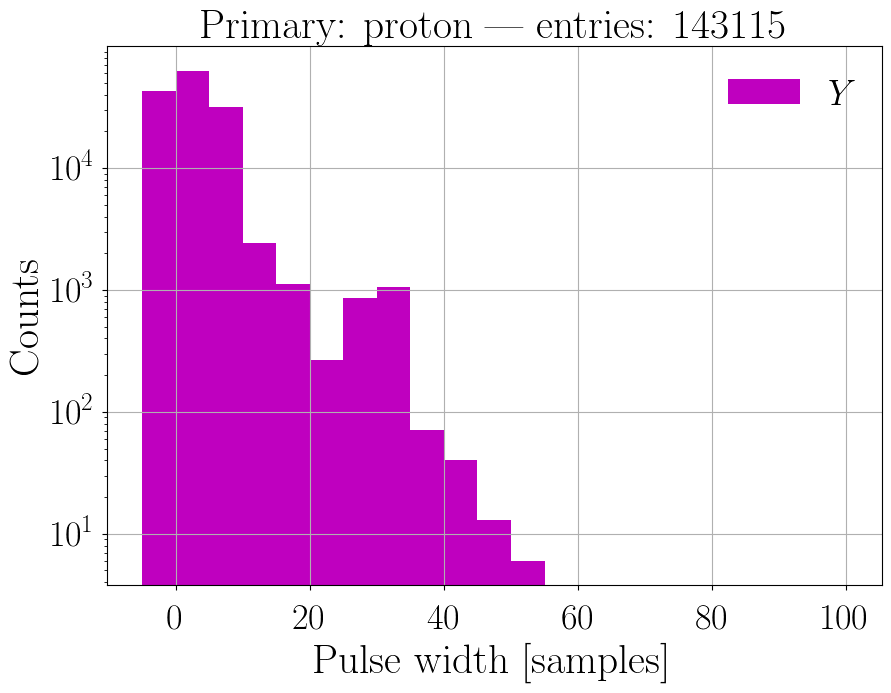

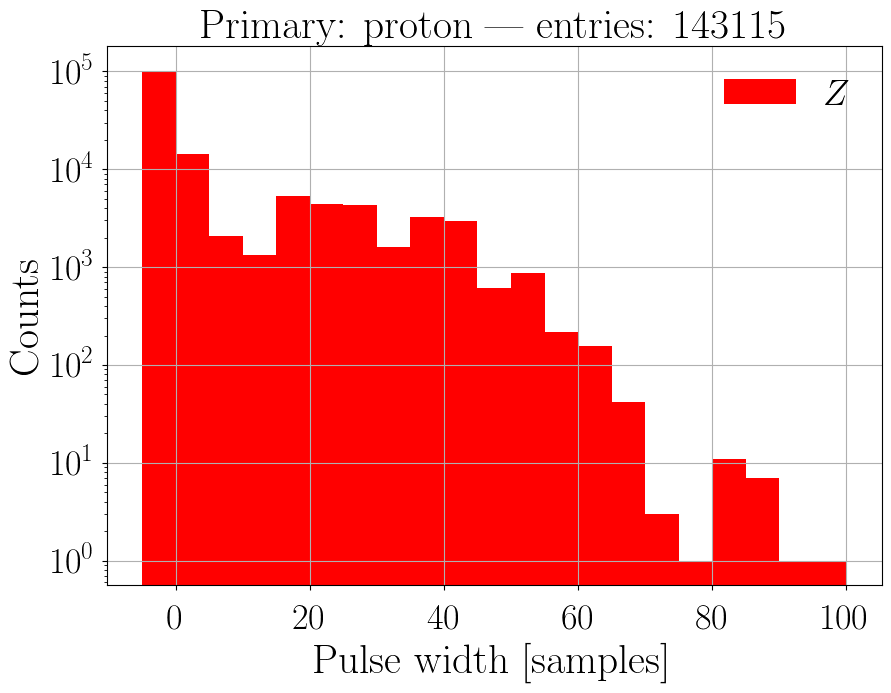

In [16]:
for pw, color, label in zip(pulse_width.T,colors,labels):
       pw_hist,_ = np.histogram(pw,bins=pw_bin_edges)

       fig, ax = plt.subplots()

       ax.bar(pw_bin_centers,
              pw_hist,
              width=pw_bin_edges[1:]-pw_bin_edges[:-1],
              color=color,
              label=label)

       ax.set_yscale('log')

       ax.set_xlabel('Pulse width [samples]')
       ax.set_ylabel('Counts')

       title = 'Primary: {} --- entries: {}'.format(primary,len(pw))
       ax.set_title(title)

       ax.legend()

       plt.show()

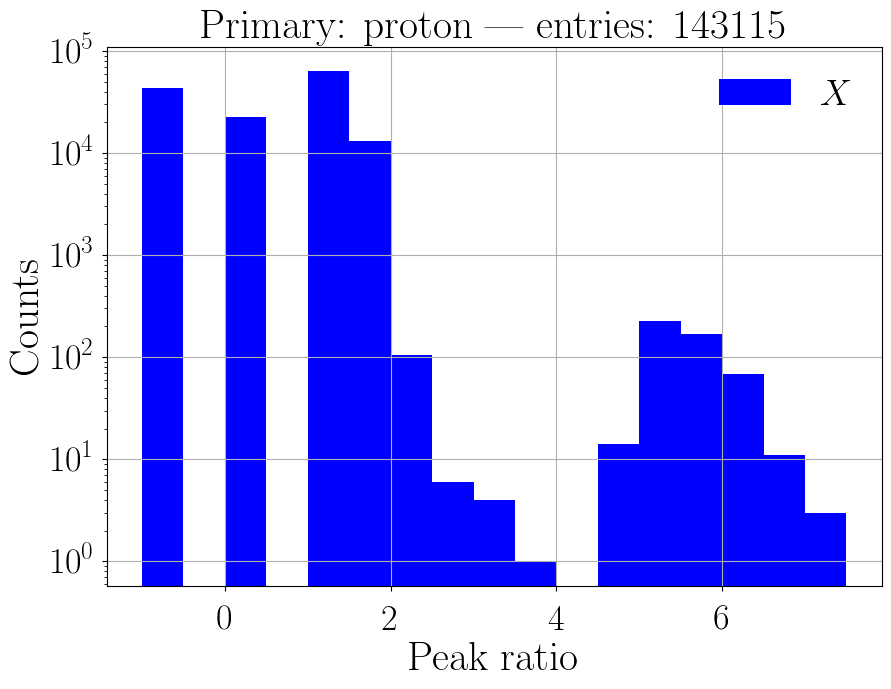

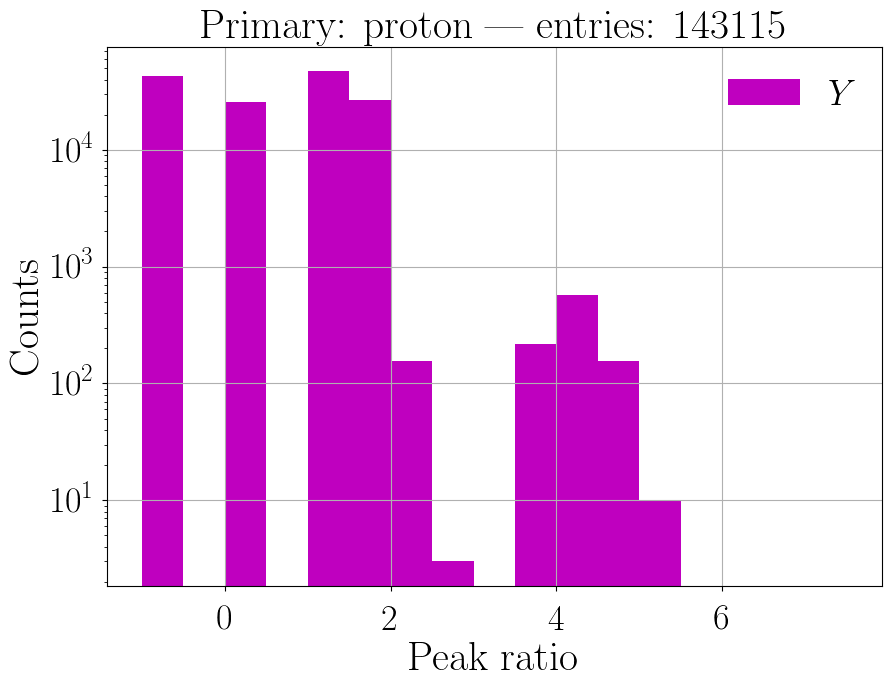

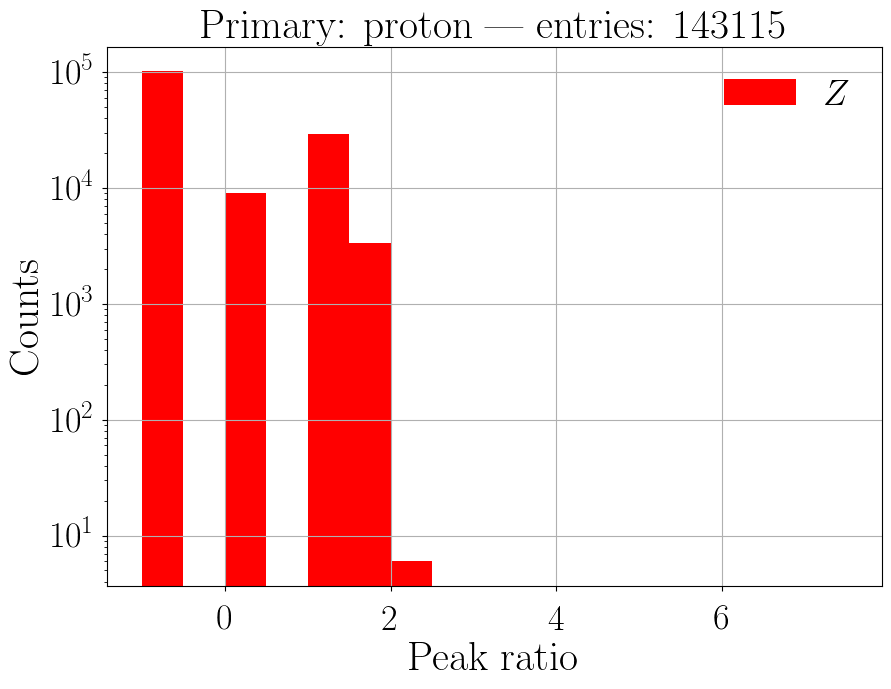

In [17]:
for pr, color, label in zip(peak_ratio.T,colors,labels):
       pr_hist,_ = np.histogram(pr,bins=pr_bin_edges)

       fig, ax = plt.subplots()

       ax.bar(pr_bin_centers,
              pr_hist,
              width=pr_bin_edges[1:]-pr_bin_edges[:-1],
              color=color,
              label=label)

       ax.set_yscale('log')

       ax.set_xlabel('Peak ratio')
       ax.set_ylabel('Counts')

       title = 'Primary: {} --- entries: {}'.format(primary,len(pr))
       ax.set_title(title)

       ax.legend()

       plt.show()

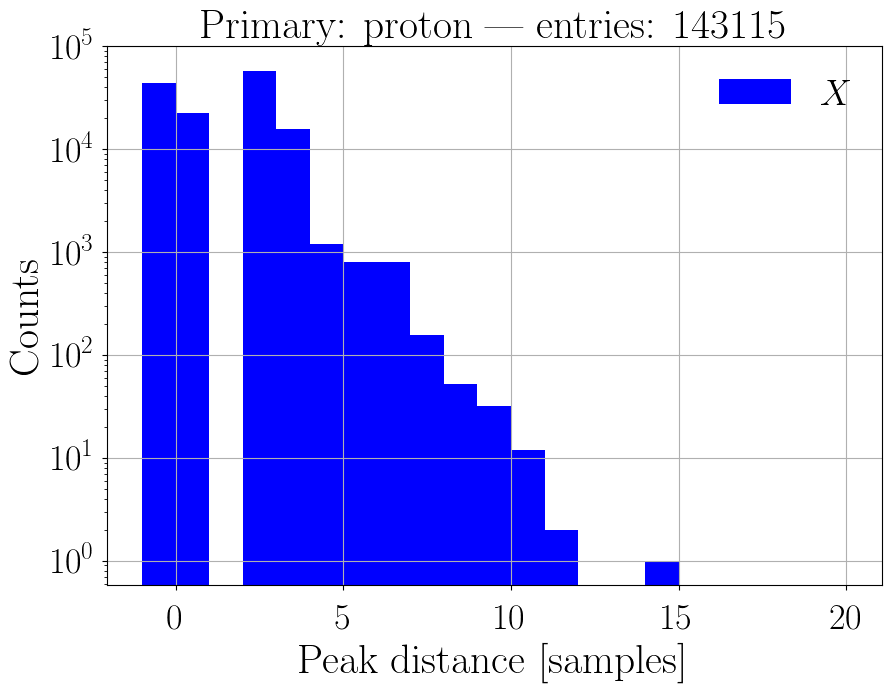

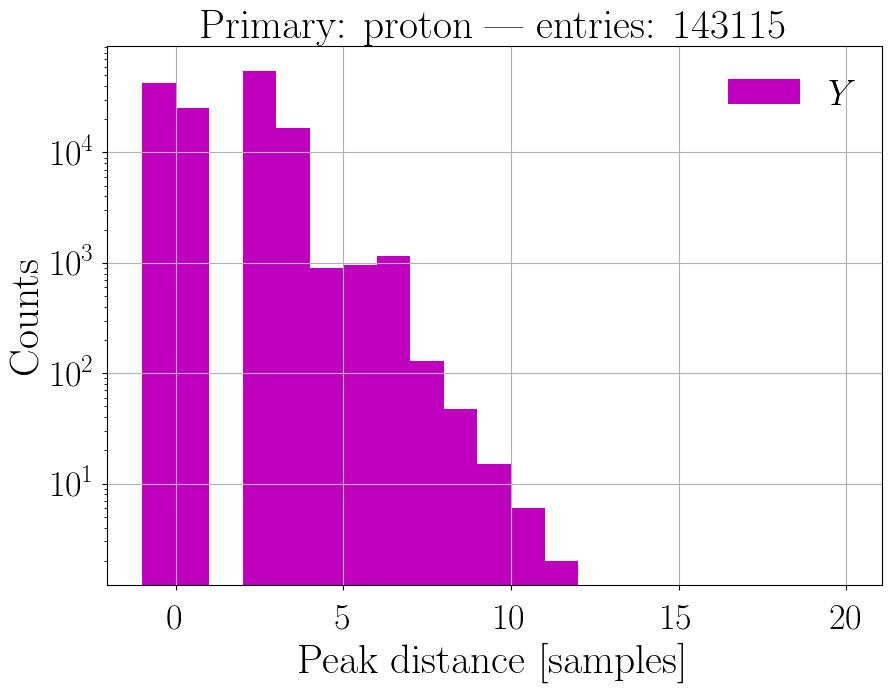

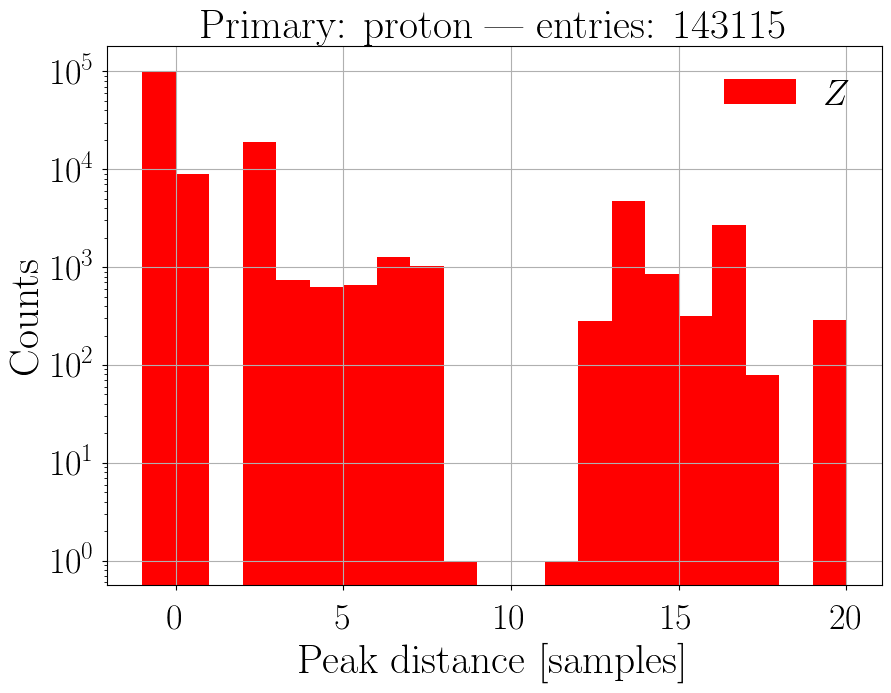

In [18]:
for pd, color, label in zip(peak_dist.T,colors,labels):
       pd_hist,_ = np.histogram(pd,bins=pd_bin_edges)

       fig, ax = plt.subplots()

       ax.bar(pd_bin_centers,
              pd_hist,
              width=pd_bin_edges[1:]-pd_bin_edges[:-1],
              color=color,
              label=label)

       ax.set_yscale('log')

       ax.set_xlabel('Peak distance [samples]')
       ax.set_ylabel('Counts')

       title = 'Primary: {} --- entries: {}'.format(primary,len(pd))
       ax.set_title(title)

       ax.legend()

       plt.show()

#### Correlation between $n_{\mathrm{peaks}}$ for all polarizations

/scratch/users/p/pcorrea/ipykernel_16842/1881176972.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(n_peaks[:,0],


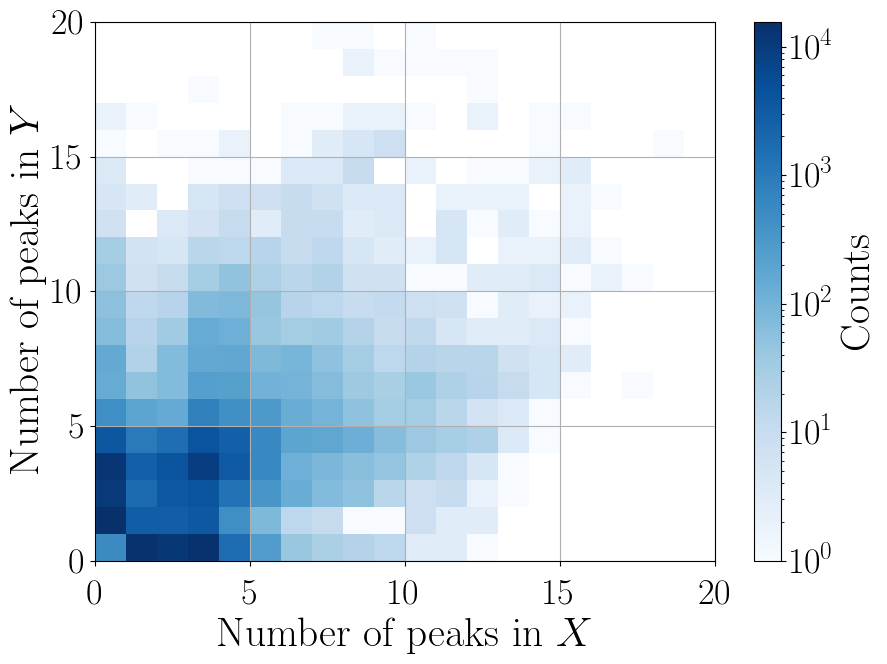

In [19]:
fig, ax = plt.subplots()

hist2d = ax.hist2d(n_peaks[:,0],
                   n_peaks[:,1],
                   bins=[n_peaks_bin_edges,n_peaks_bin_edges],
                   cmap='Blues',
                   norm=matplotlib.colors.LogNorm())

fig.colorbar(hist2d[3], ax=ax, label='Counts')

ax.set_xlim([0,20])
ax.set_ylim([0,20])

ax.set_xlabel('Number of peaks in $X$')
ax.set_ylabel('Number of peaks in $Y$')

ax.grid(True)

plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/2068677263.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(n_peaks[:,0],


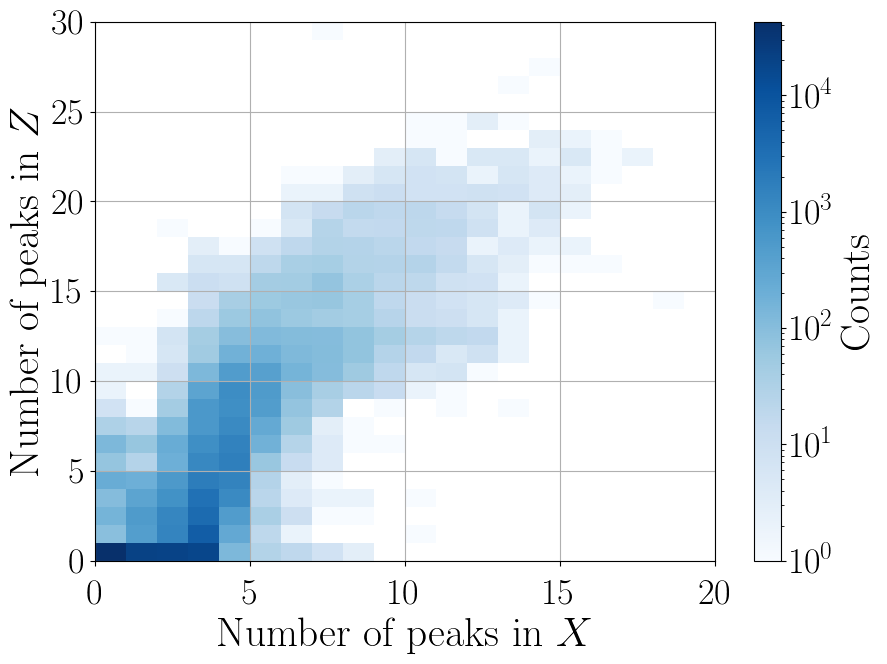

In [20]:
fig, ax = plt.subplots()

hist2d = ax.hist2d(n_peaks[:,0],
                   n_peaks[:,2],
                   bins=[n_peaks_bin_edges,n_peaks_bin_edges],
                   cmap='Blues',
                   norm=matplotlib.colors.LogNorm())

fig.colorbar(hist2d[3], ax=ax, label='Counts')

ax.set_xlim([0,20])
ax.set_ylim([0,30])

ax.set_xlabel('Number of peaks in $X$')
ax.set_ylabel('Number of peaks in $Z$')

ax.grid(True)

plt.show()

### Correlations between pulse shape parameters

/scratch/users/p/pcorrea/ipykernel_16842/1927442133.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(npeak,


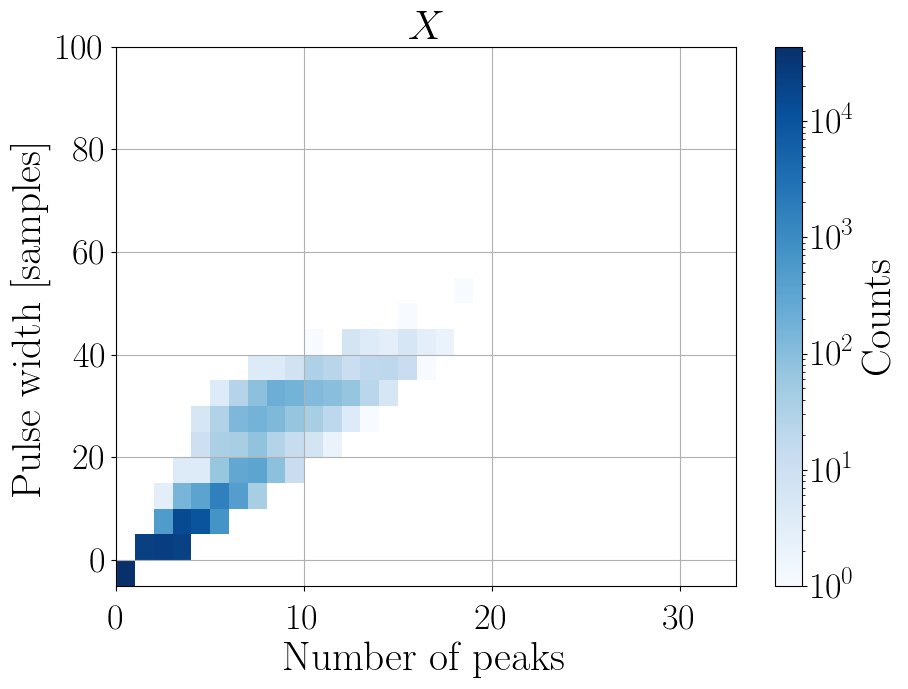

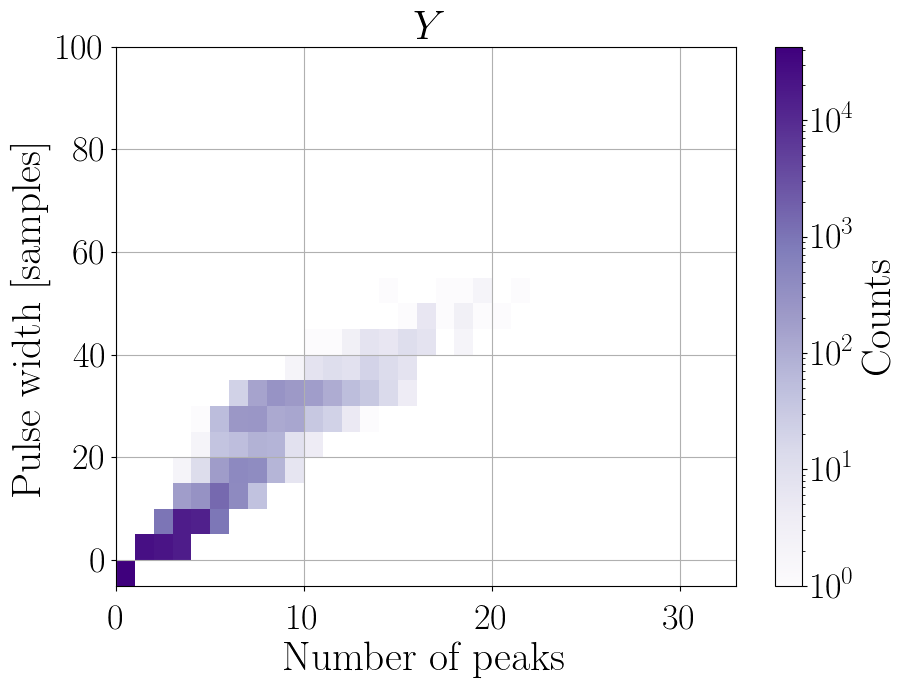

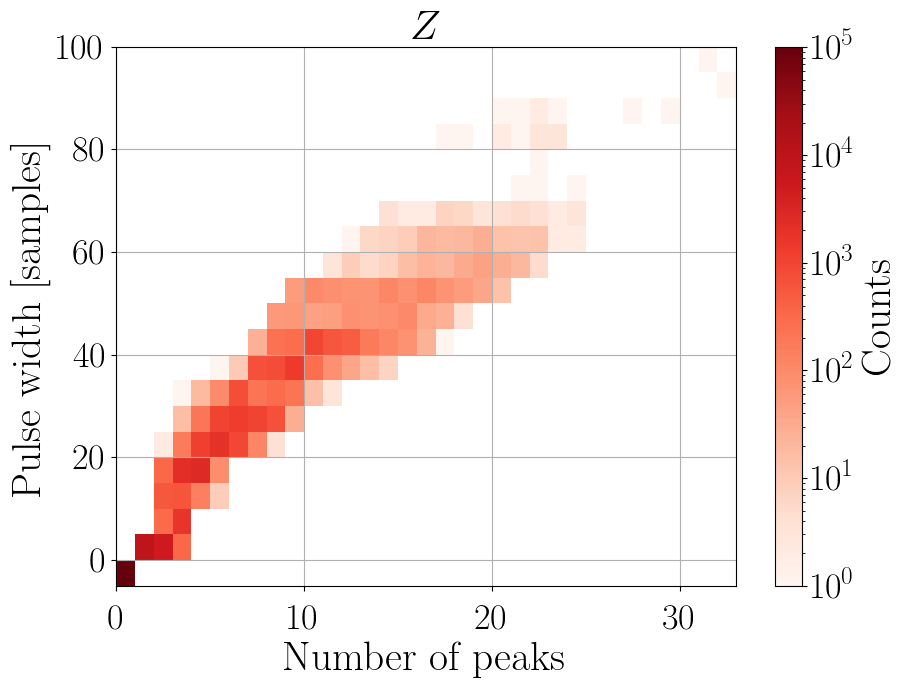

In [21]:
for npeak, pw, label, cmap in zip(n_peaks.T,pulse_width.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(npeak,
                       pw,
                       bins=[n_peaks_bin_edges,pw_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlabel(r'Number of peaks')
    ax.set_ylabel(r'Pulse width [samples]')

    ax.set_title(label)
    
    ax.grid(True)

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/3193950319.py:4: RuntimeWarning: divide by zero encountered in log10
  hist2d = ax.hist2d(np.log10(p2p),
/scratch/users/p/pcorrea/ipykernel_16842/3193950319.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(p2p),


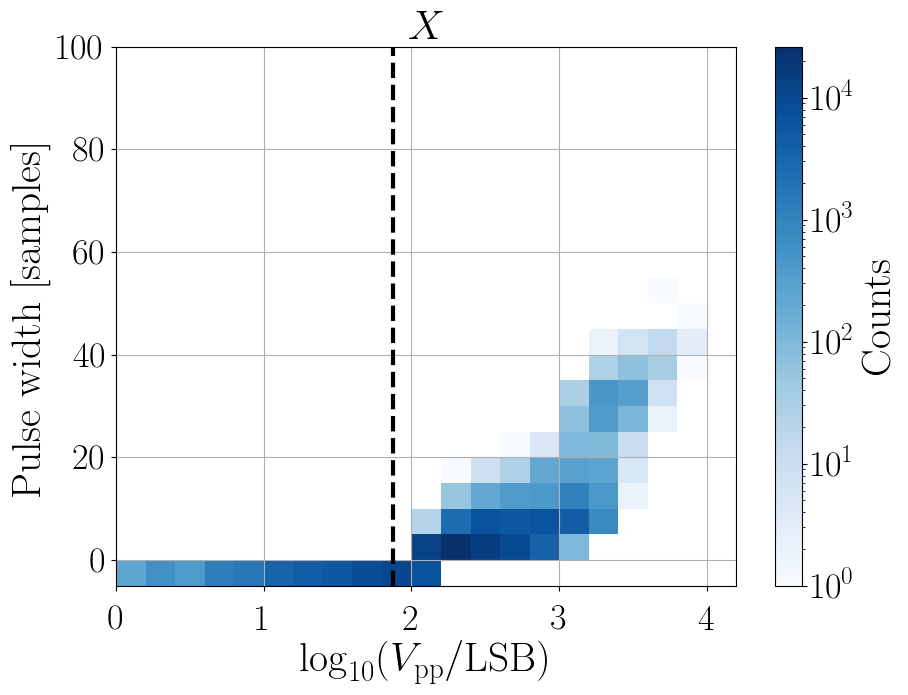

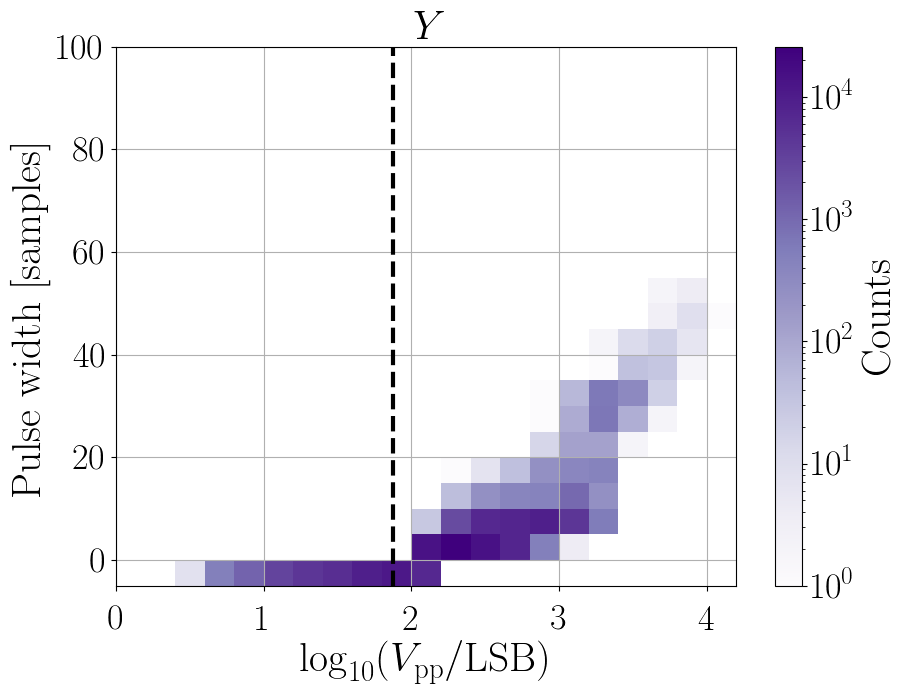

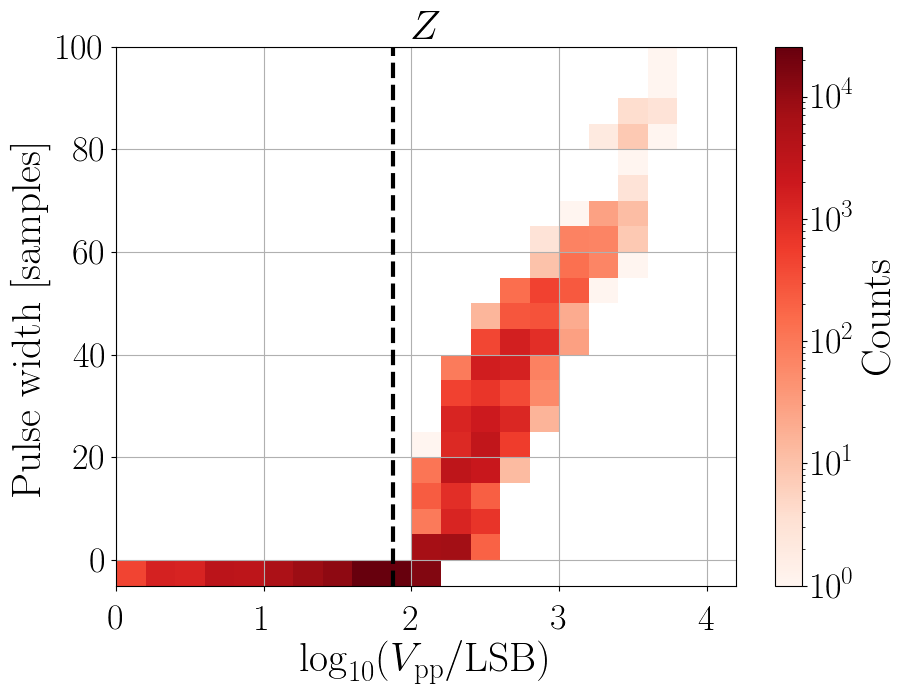

In [22]:
for p2p, pw, label, cmap in zip(peak_to_peak.T,pulse_width.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(np.log10(p2p),
                       pw,
                       bins=[log_p2p_bin_edges,pw_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())
    
    ax.axvline(np.log10(75),
                  color='k',
                  linestyle='--')

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlabel(r'$\log_{10} (V_{\mathrm{pp}} / \mathrm{LSB})$')
    ax.set_ylabel(r'Pulse width [samples]')

    ax.set_title(label)

    ax.grid(True)

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/4106058870.py:4: RuntimeWarning: divide by zero encountered in log10
  hist2d = ax.hist2d(np.log10(p2p),
/scratch/users/p/pcorrea/ipykernel_16842/4106058870.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(p2p),


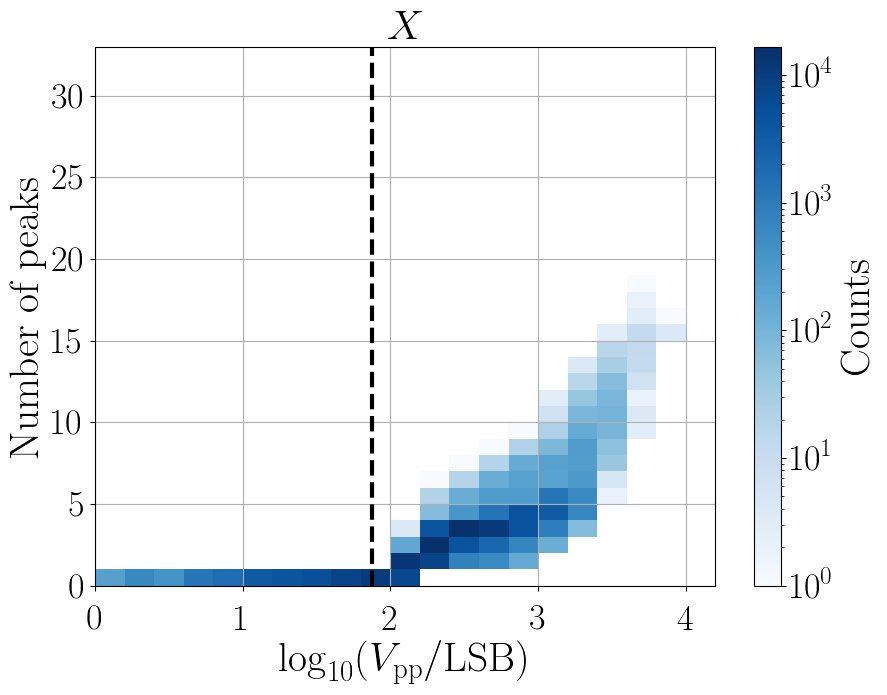

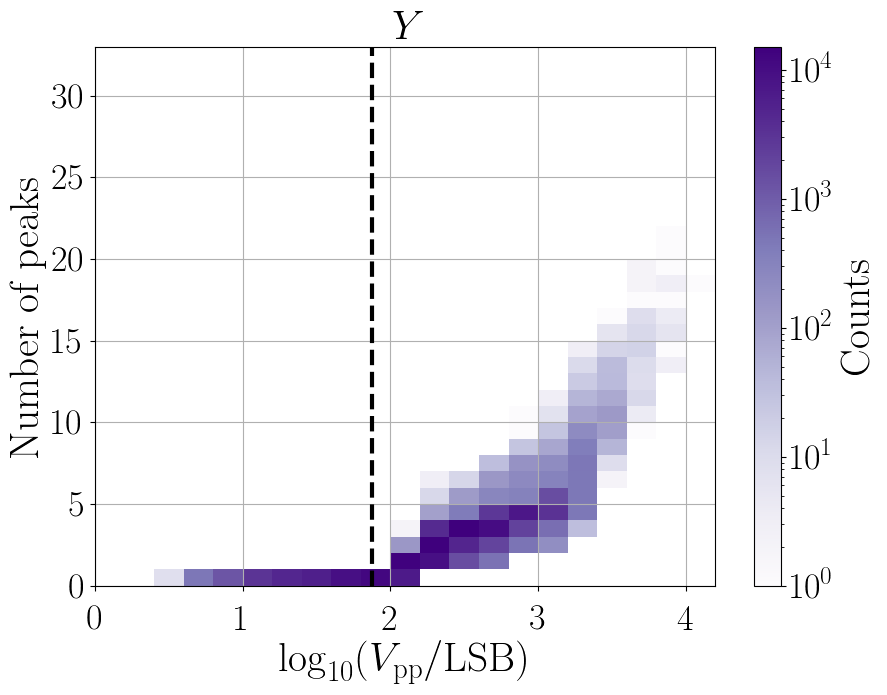

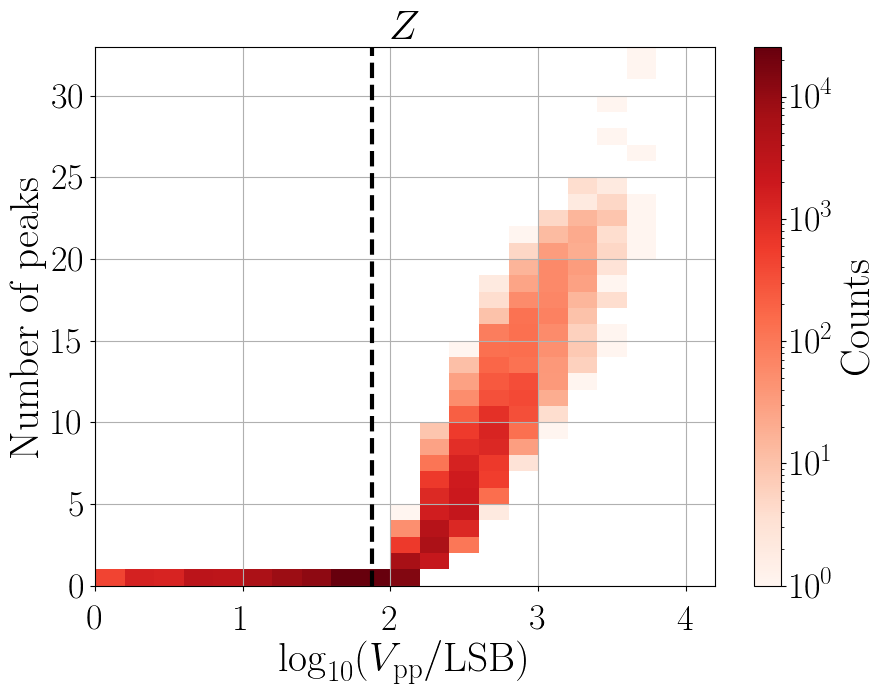

In [23]:
for p2p, n_peak, label, cmap in zip(peak_to_peak.T,n_peaks.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(np.log10(p2p),
                       n_peak,
                       bins=[log_p2p_bin_edges,n_peaks_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())
    
    ax.axvline(np.log10(75),
                  color='k',
                  linestyle='--')

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlabel(r'$\log_{10} (V_{\mathrm{pp}} / \mathrm{LSB})$')
    ax.set_ylabel(r'Number of peaks')

    ax.set_title(label)

    ax.grid(True)

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/480024870.py:4: RuntimeWarning: divide by zero encountered in log10
  hist2d = ax.hist2d(np.log10(p2p),
/scratch/users/p/pcorrea/ipykernel_16842/480024870.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(p2p),


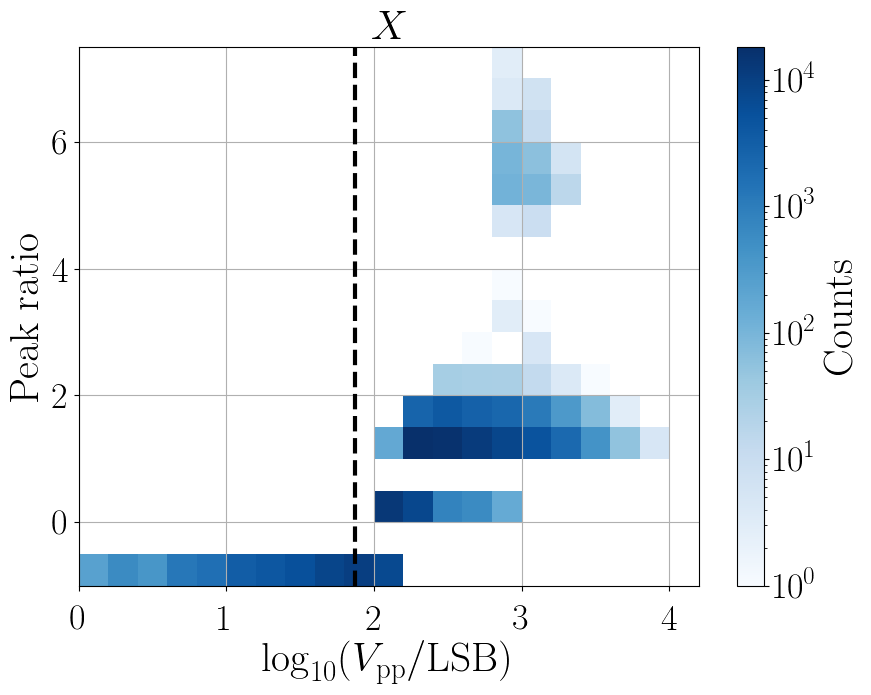

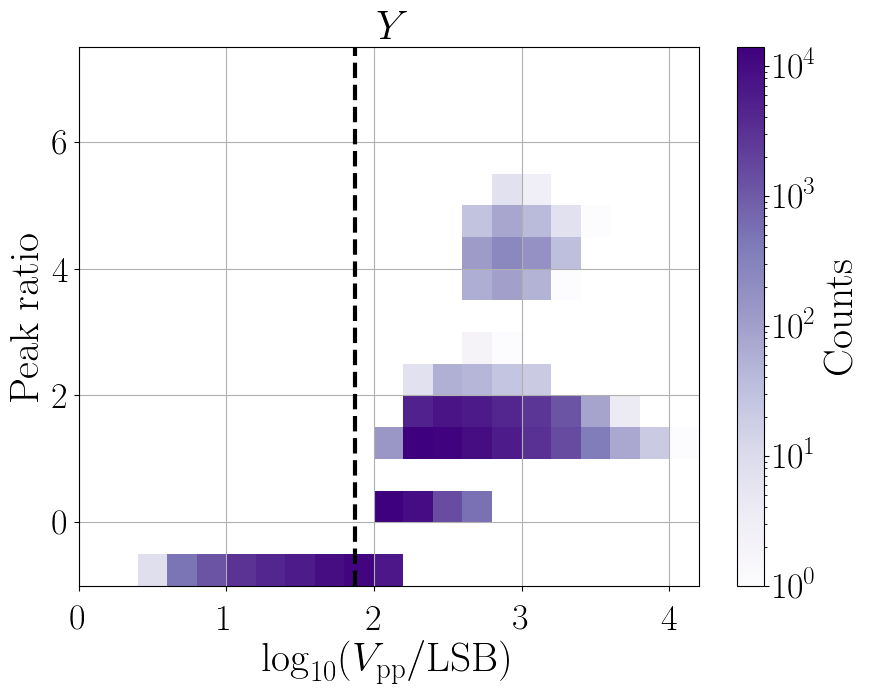

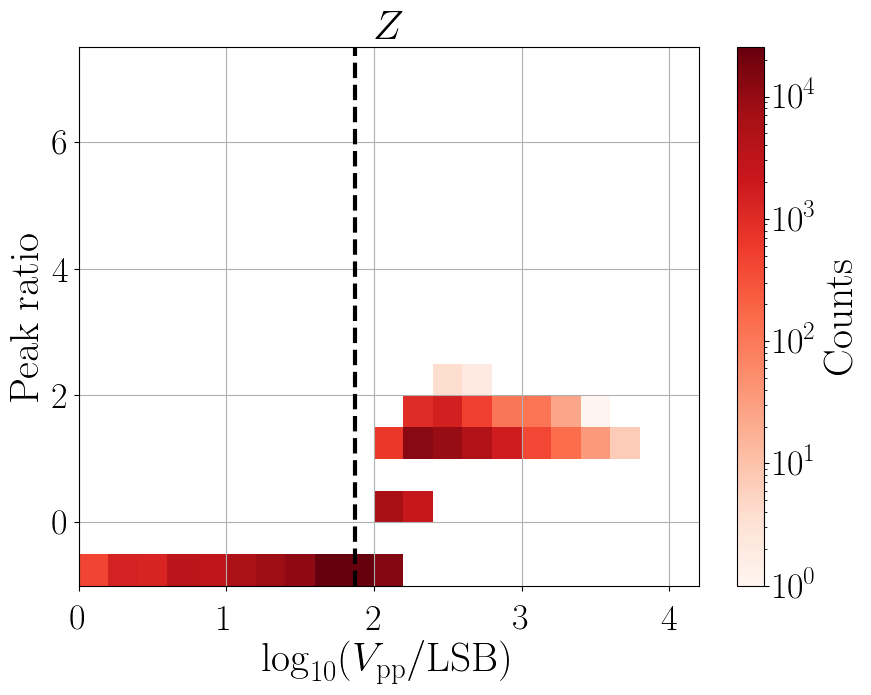

In [24]:
for p2p, pr, label, cmap in zip(peak_to_peak.T,peak_ratio.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(np.log10(p2p),
                       pr,
                       bins=[log_p2p_bin_edges,pr_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())
    
    ax.axvline(np.log10(75),
                  color='k',
                  linestyle='--')

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlabel(r'$\log_{10} (V_{\mathrm{pp}} / \mathrm{LSB})$')
    ax.set_ylabel(r'Peak ratio')

    ax.set_title(label)

    ax.grid(True)

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/1068121567.py:4: RuntimeWarning: divide by zero encountered in log10
  hist2d = ax.hist2d(np.log10(p2p),
/scratch/users/p/pcorrea/ipykernel_16842/1068121567.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(p2p),


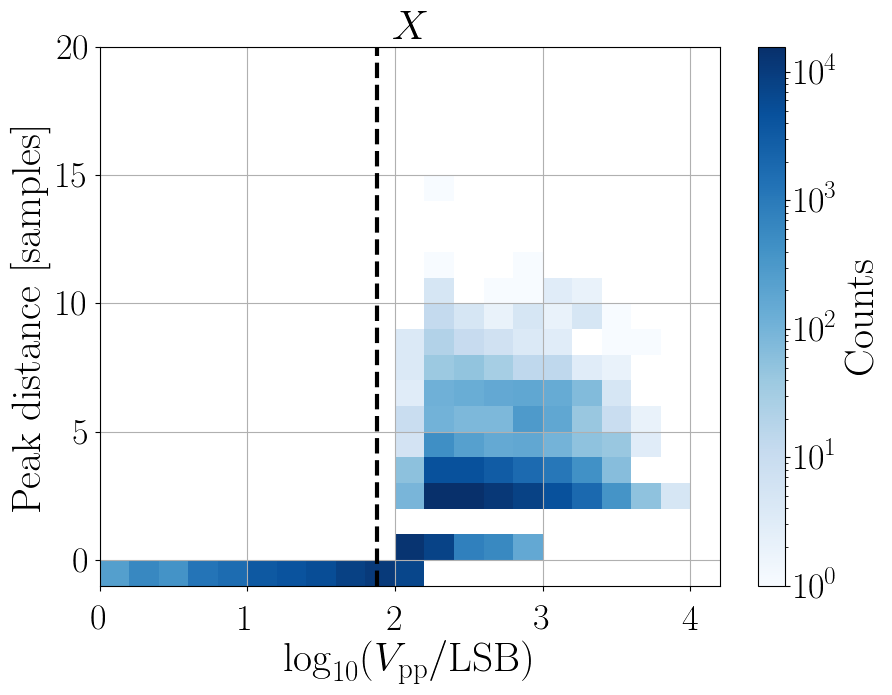

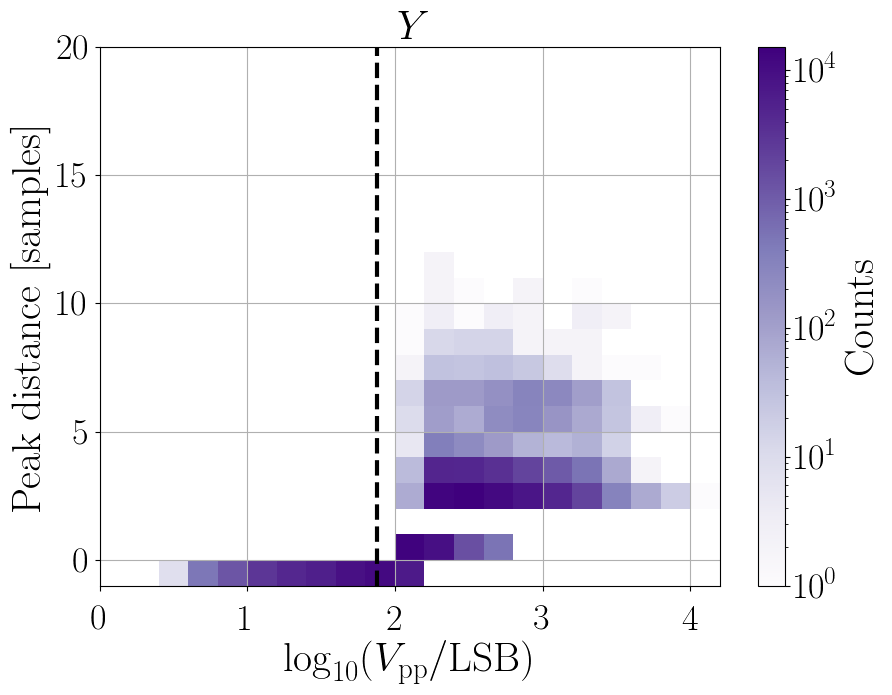

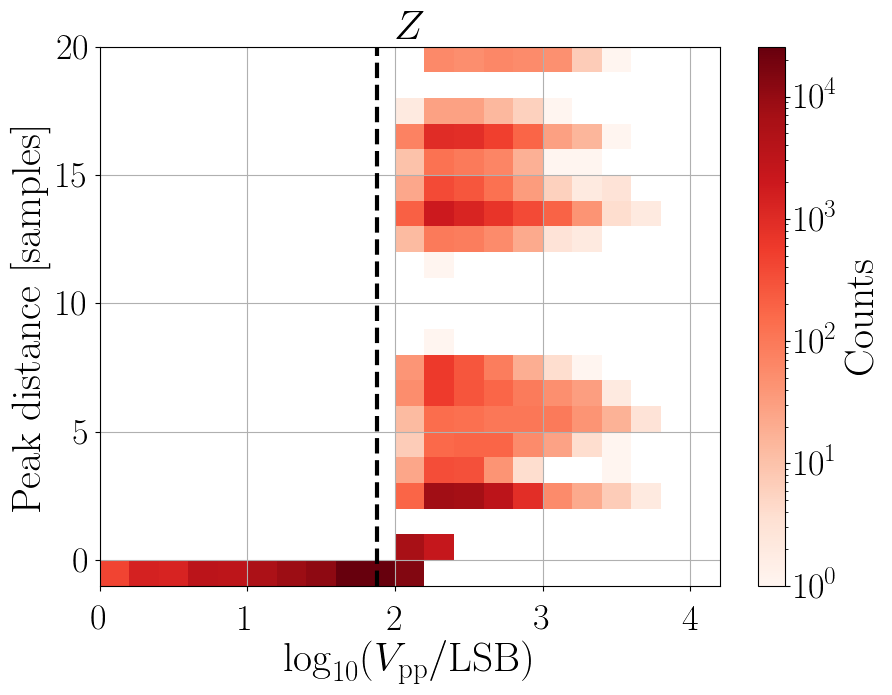

In [25]:
for p2p, pd, label, cmap in zip(peak_to_peak.T,peak_dist.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(np.log10(p2p),
                       pd,
                       bins=[log_p2p_bin_edges,pd_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())
    
    ax.axvline(np.log10(75),
                  color='k',
                  linestyle='--')

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlabel(r'$\log_{10} (V_{\mathrm{pp}} / \mathrm{LSB})$')
    ax.set_ylabel(r'Peak distance [samples]')

    ax.set_title(label)

    ax.grid(True)

    plt.show()

## Pulse shape parameters in function of shower parameters

### As function of energy

/scratch/users/p/pcorrea/ipykernel_16842/982173366.py:5: RuntimeWarning: divide by zero encountered in log10
  np.log10(p2p),
/scratch/users/p/pcorrea/ipykernel_16842/982173366.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(energy),


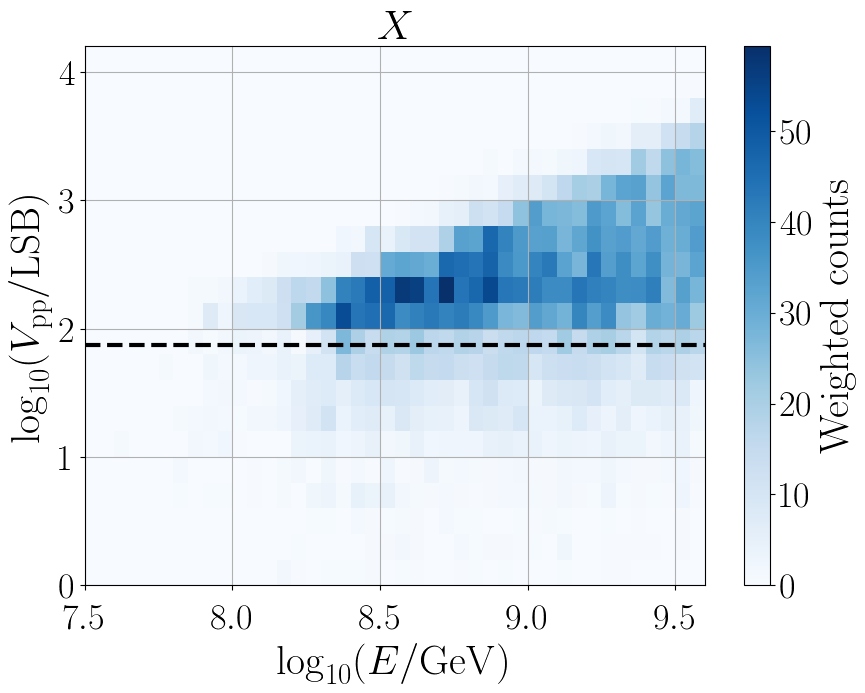

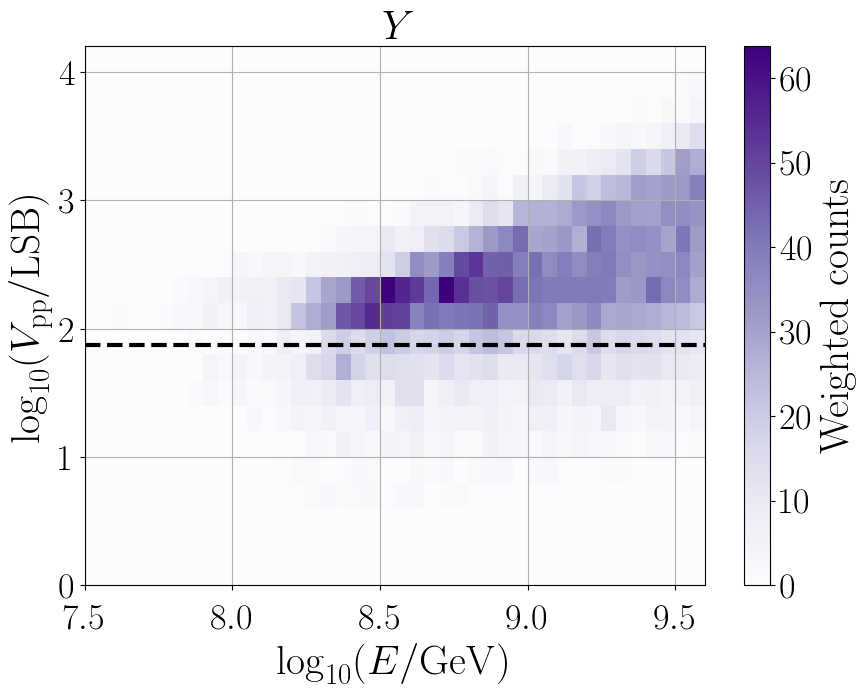

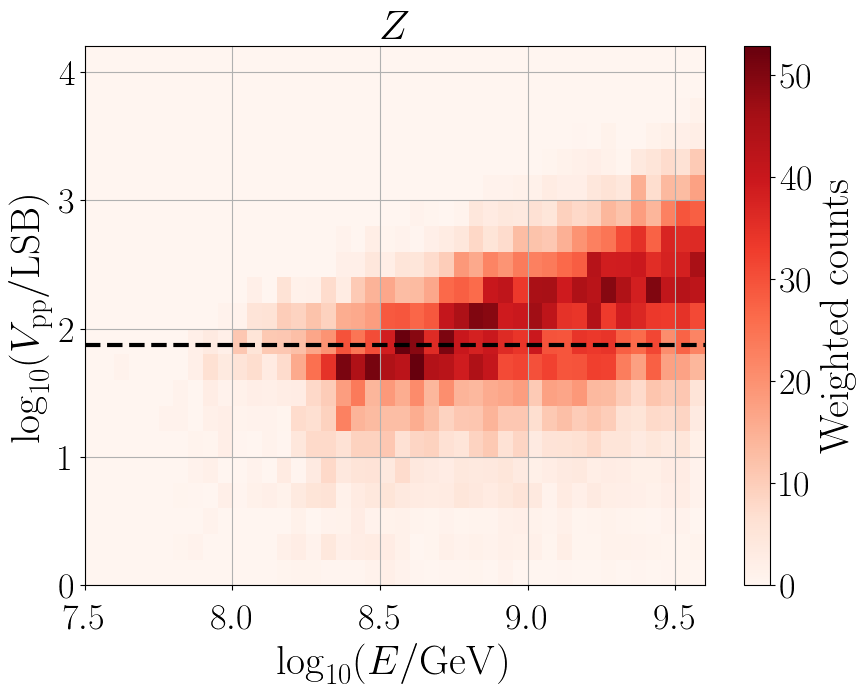

In [26]:
for p2p, label, cmap in zip(peak_to_peak.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(np.log10(energy),
                       np.log10(p2p),
                       bins=[log_energy_bin_edges,log_p2p_bin_edges],
                       cmap=cmap,
                       weights=weights_energy)
    
    ax.axhline(np.log10(75),
               color='k',
               linestyle='--')

    fig.colorbar(hist2d[3], ax=ax, label='Weighted counts')

    ax.set_xlabel(r'$\log_{10} (E/\mathrm{GeV})$')
    ax.set_ylabel(r'$\log_{10} (V_{\mathrm{pp}} / \mathrm{LSB})$')

    ax.set_title(label)

    ax.grid(True)

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/1499674061.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(energy),


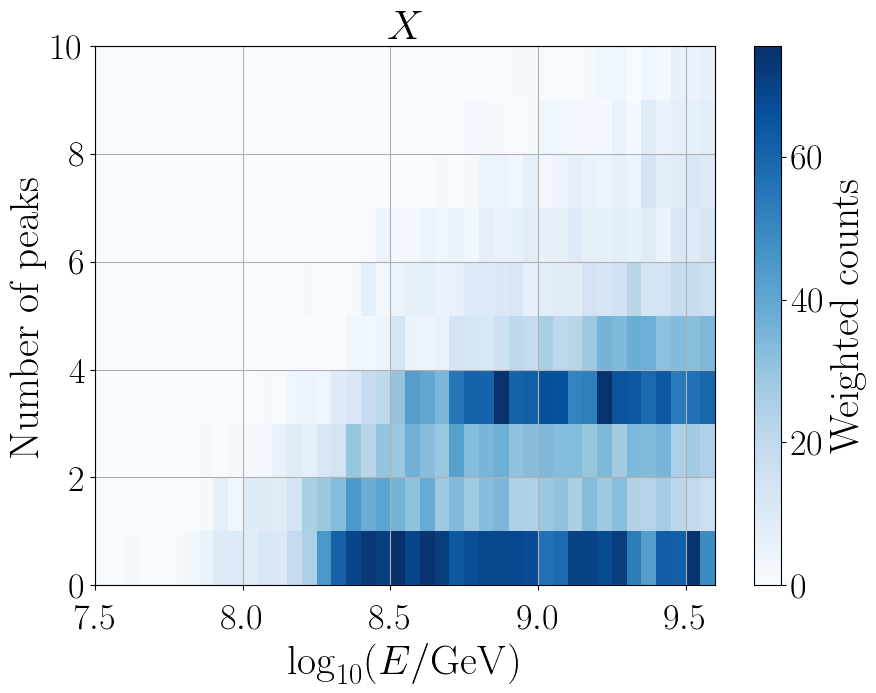

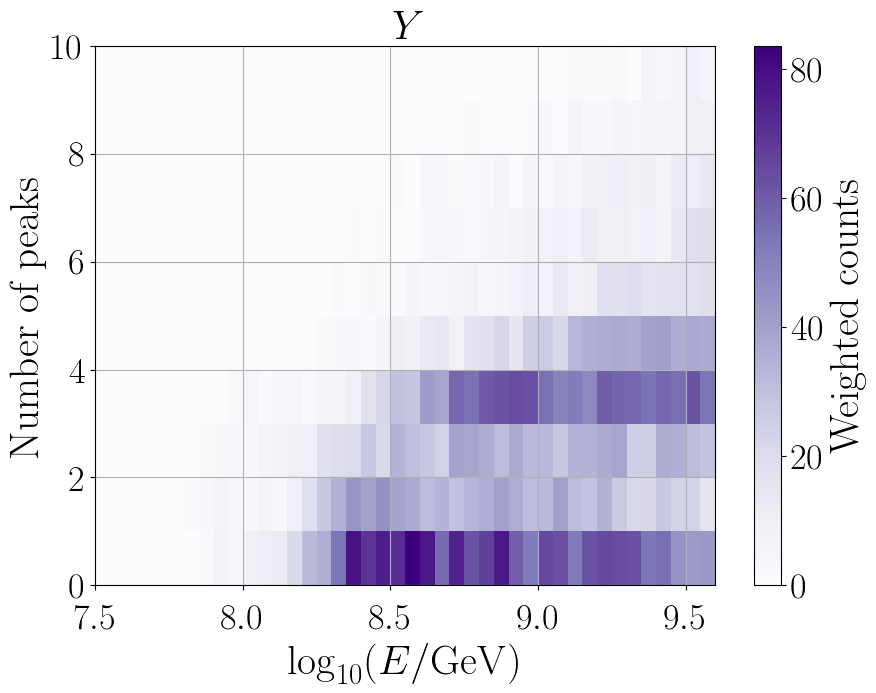

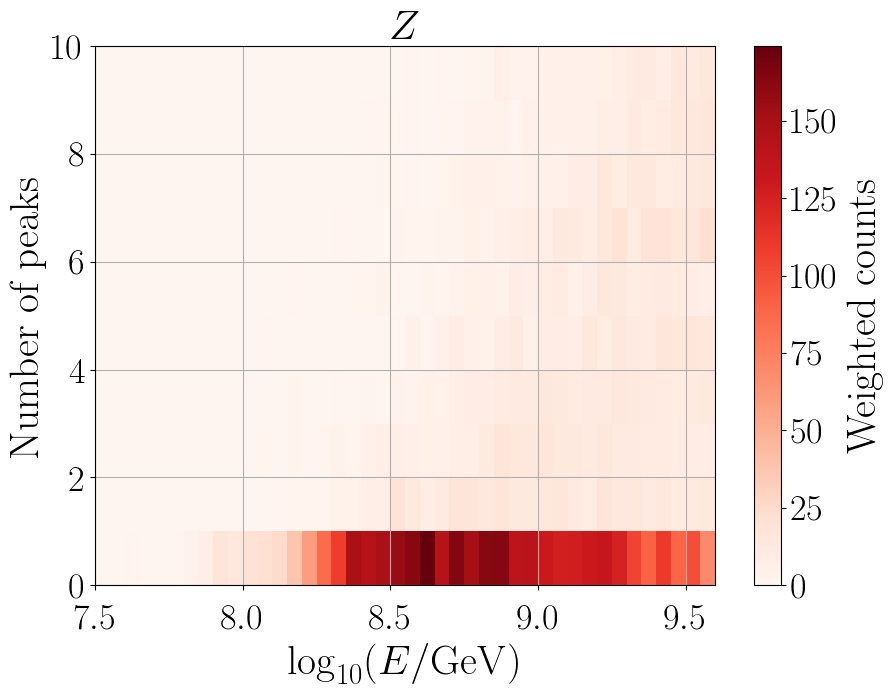

In [27]:
for npeak, label, cmap in zip(n_peaks.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(np.log10(energy),
                       npeak,
                       bins=[log_energy_bin_edges,n_peaks_bin_edges],
                       weights=weights_energy,
                       cmap=cmap)

    fig.colorbar(hist2d[3], ax=ax, label='Weighted counts')

    ax.set_ylim([0,10])

    ax.set_xlabel(r'$\log_{10} (E/\mathrm{GeV})$')
    ax.set_ylabel(r'Number of peaks')

    ax.set_title(label)

    ax.grid()

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/483517390.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(energy),


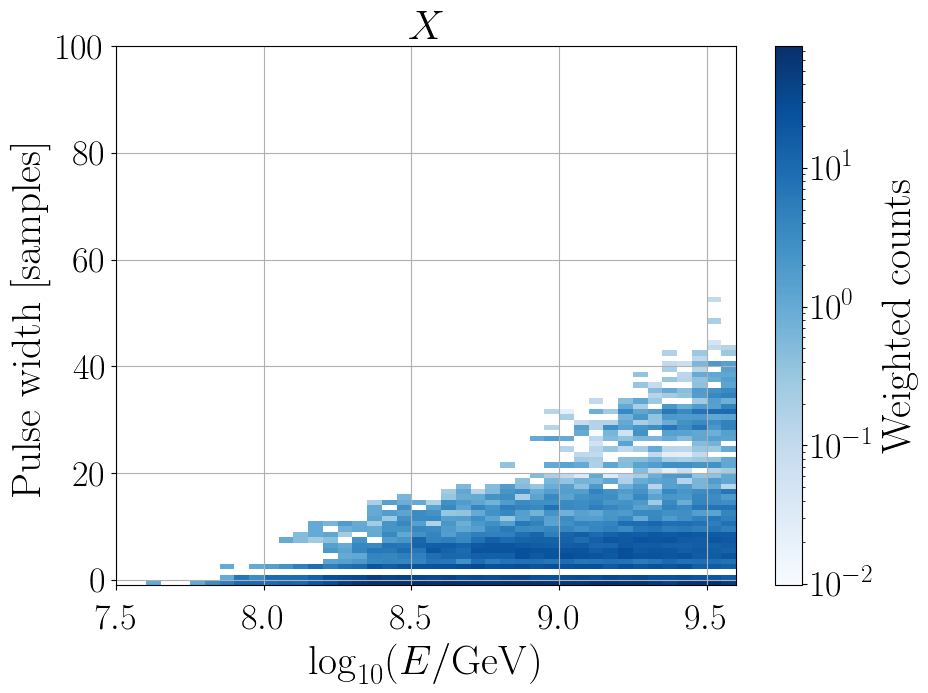

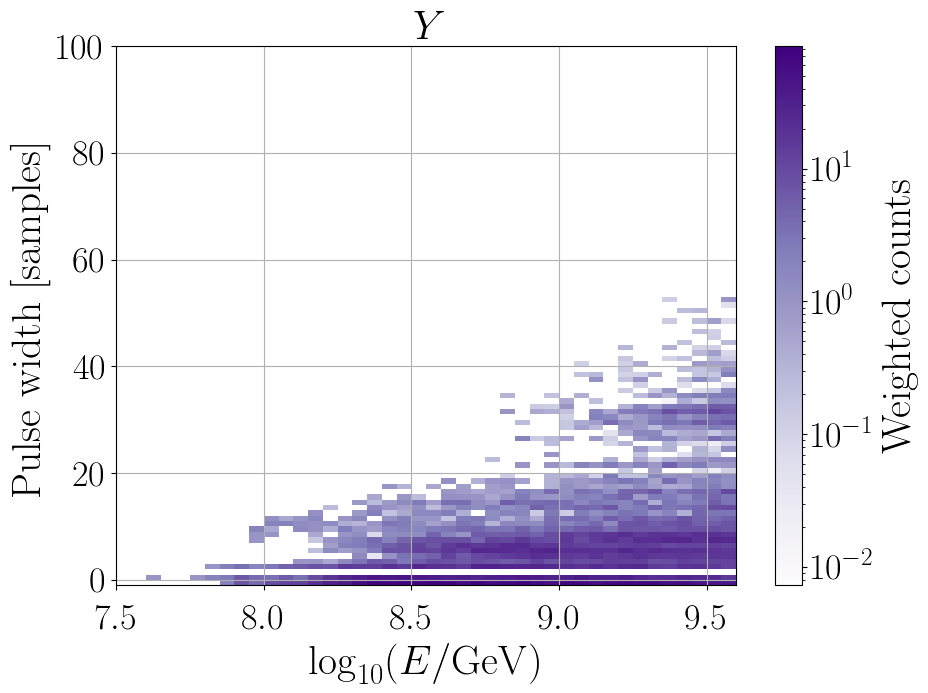

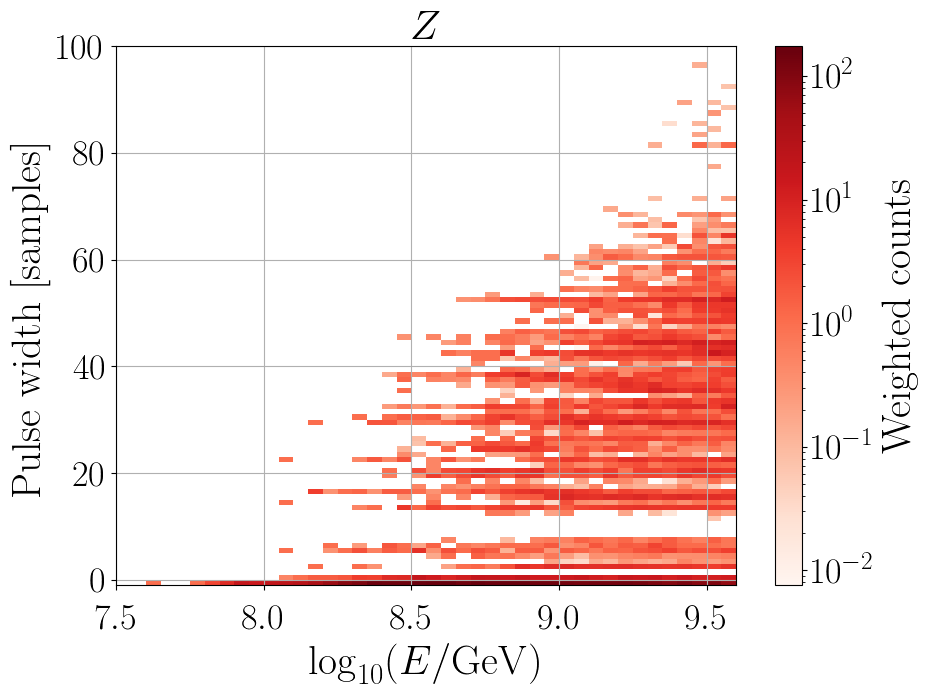

In [43]:
for pw, label, cmap in zip(pulse_width.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(np.log10(energy),
                       pw,
                       bins=[log_energy_bin_edges,pw_bin_edges],
                       cmap=cmap,
                       weights=weights_energy,
                       norm=matplotlib.colors.LogNorm())

    fig.colorbar(hist2d[3], ax=ax, label='Weighted counts')

    #ax.set_ylim([-1,40])

    ax.set_xlabel(r'$\log_{10} (E/\mathrm{GeV})$')
    ax.set_ylabel(r'Pulse width [samples]')

    ax.set_title(label)

    ax.grid()

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/3299187297.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(energy),


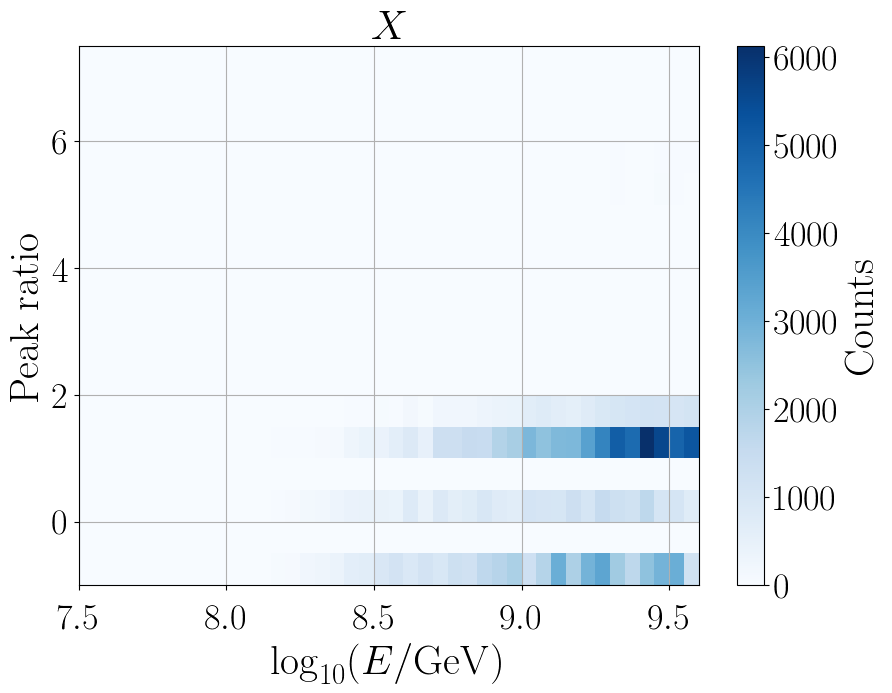

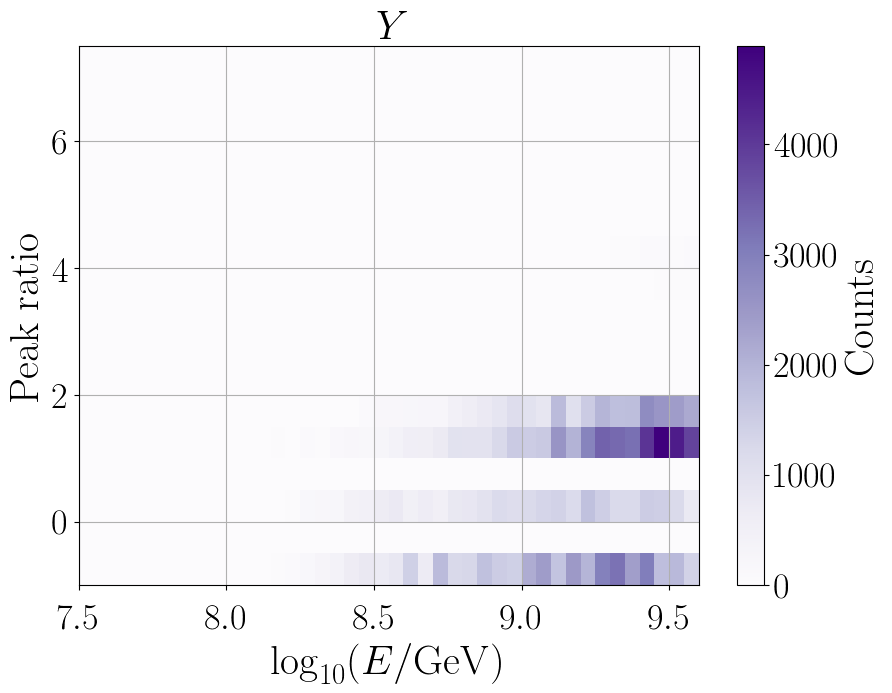

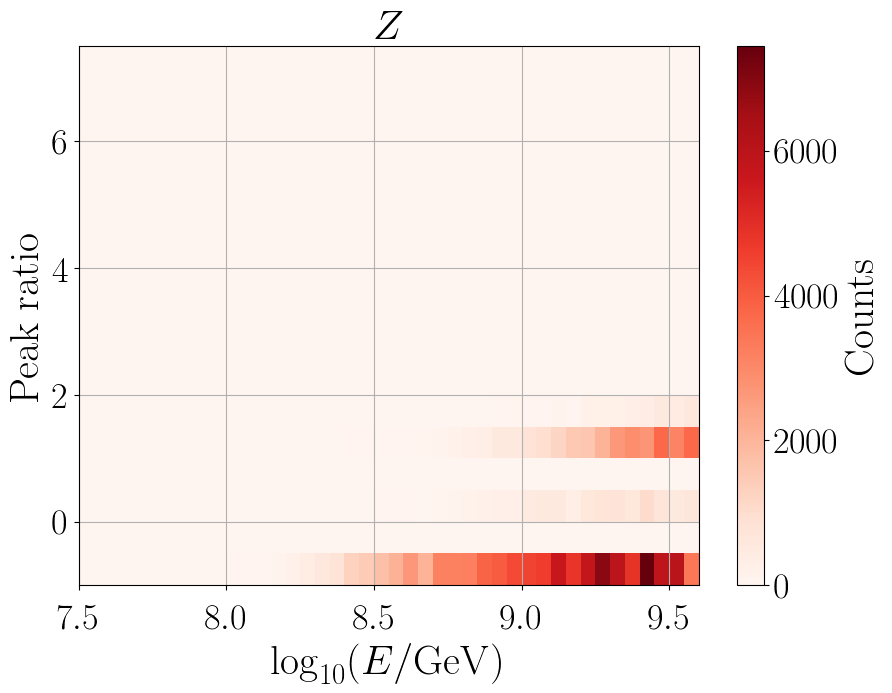

In [29]:
for pr, label, cmap in zip(peak_ratio.T,labels,cmaps):
    fig, ax = plt.subplots()
    
    hist2d = ax.hist2d(np.log10(energy),
                       pr,
                       bins=[log_energy_bin_edges,pr_bin_edges],
                       cmap=cmap)

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlabel(r'$\log_{10} (E/\mathrm{GeV})$')
    ax.set_ylabel(r'Peak ratio')

    ax.set_title(label)

    ax.grid()

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/2181972083.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(np.log10(energy),


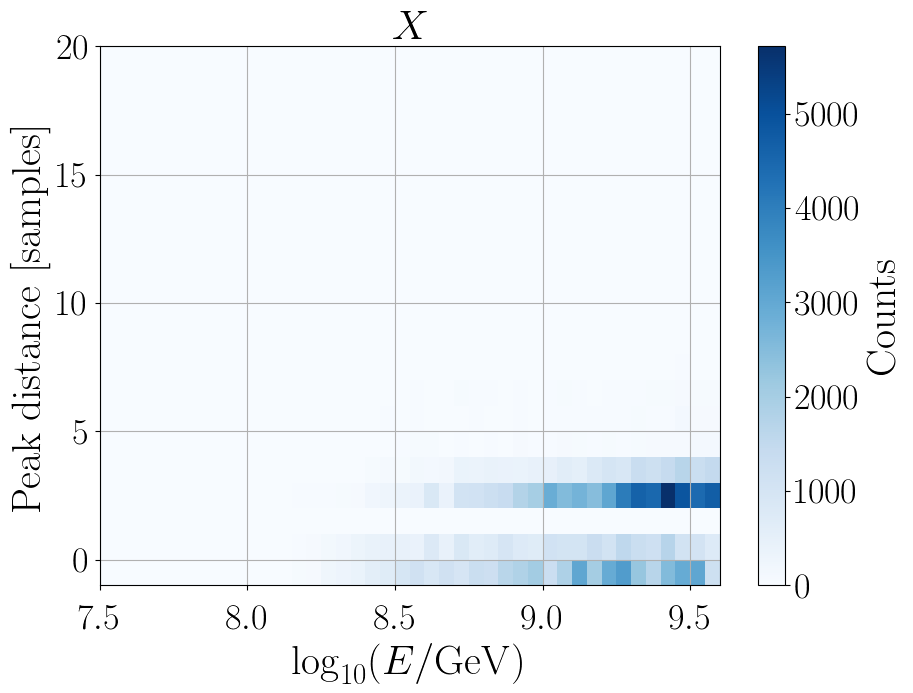

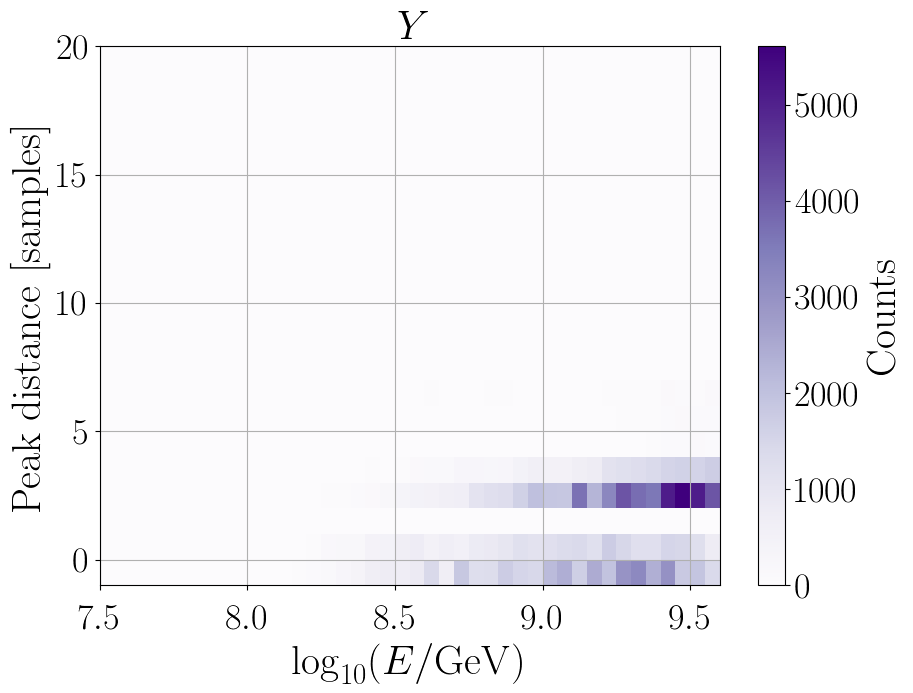

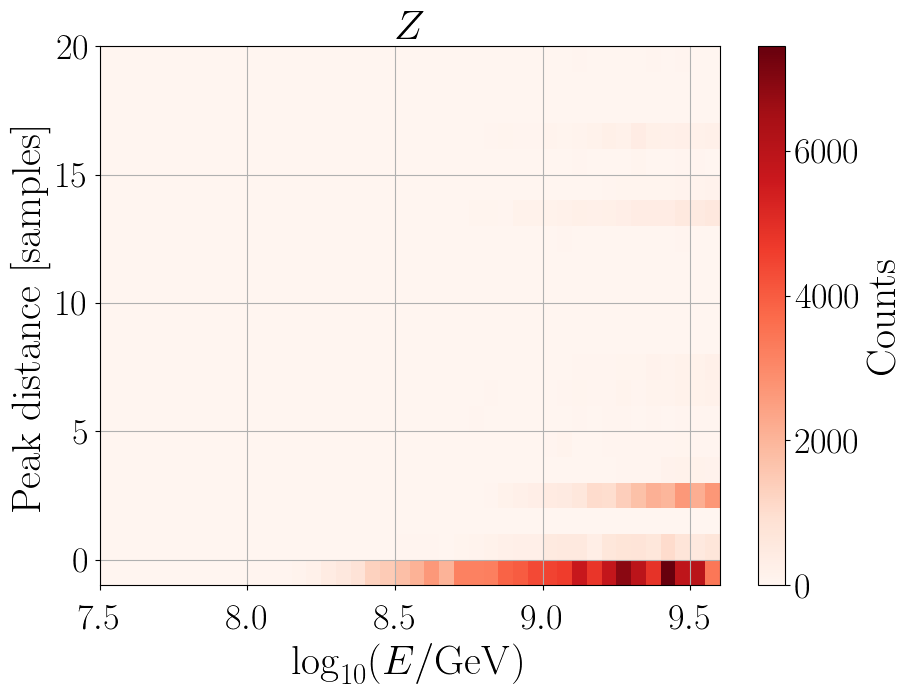

In [30]:
for pd, label, cmap in zip(peak_dist.T,labels,cmaps):
    fig, ax = plt.subplots()
    
    hist2d = ax.hist2d(np.log10(energy),
                       pd,
                       bins=[log_energy_bin_edges,pd_bin_edges],
                       cmap=cmap)

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlabel(r'$\log_{10} (E/\mathrm{GeV})$')
    ax.set_ylabel(r'Peak distance [samples]')

    ax.set_title(label)

    ax.grid()

    plt.show()

### As function of zenith

/scratch/users/p/pcorrea/ipykernel_16842/1430373843.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith,


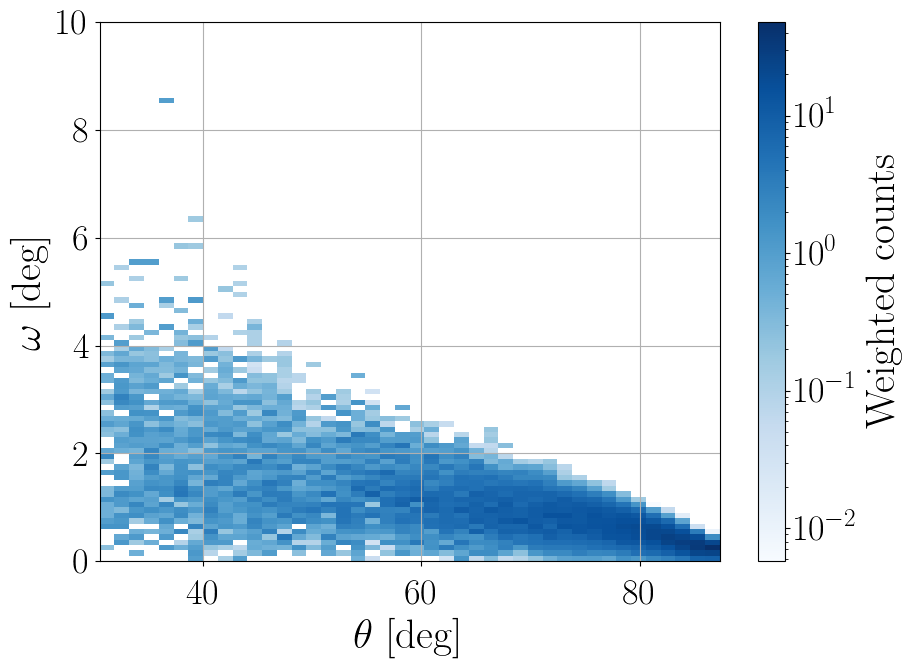

In [31]:
fig, ax = plt.subplots()

hist2d = ax.hist2d(zenith,
                   omega,
                   bins=[zenith_bin_edges,omega_bin_edges],
                   cmap='Blues',
                   weights=weights_zenith,
                   norm=matplotlib.colors.LogNorm())

fig.colorbar(hist2d[3], ax=ax, label='Weighted counts')

ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'$\omega$ [deg]')

ax.grid(True)

plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/2397313740.py:5: RuntimeWarning: divide by zero encountered in log10
  np.log10(p2p),
/scratch/users/p/pcorrea/ipykernel_16842/2397313740.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith,


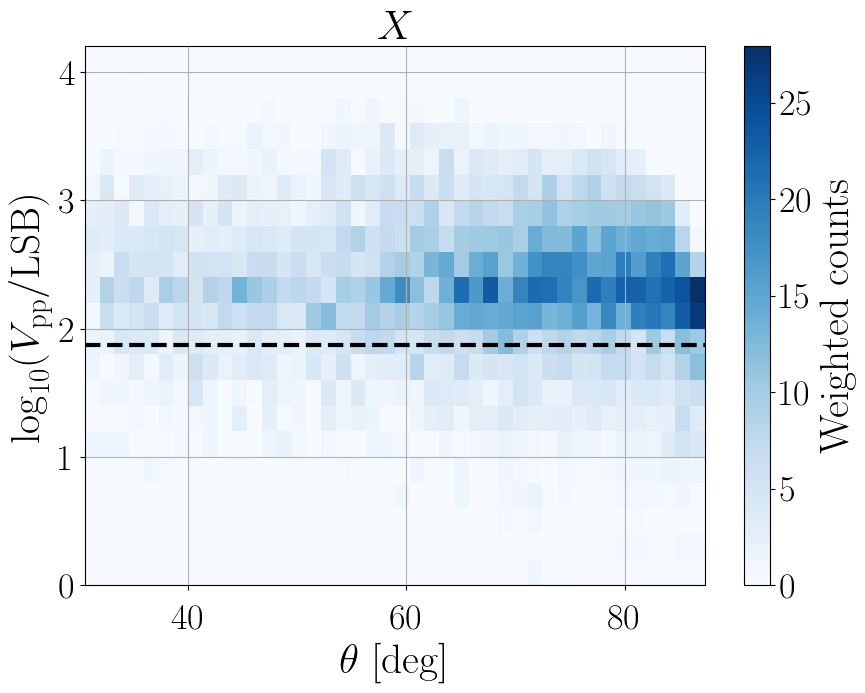

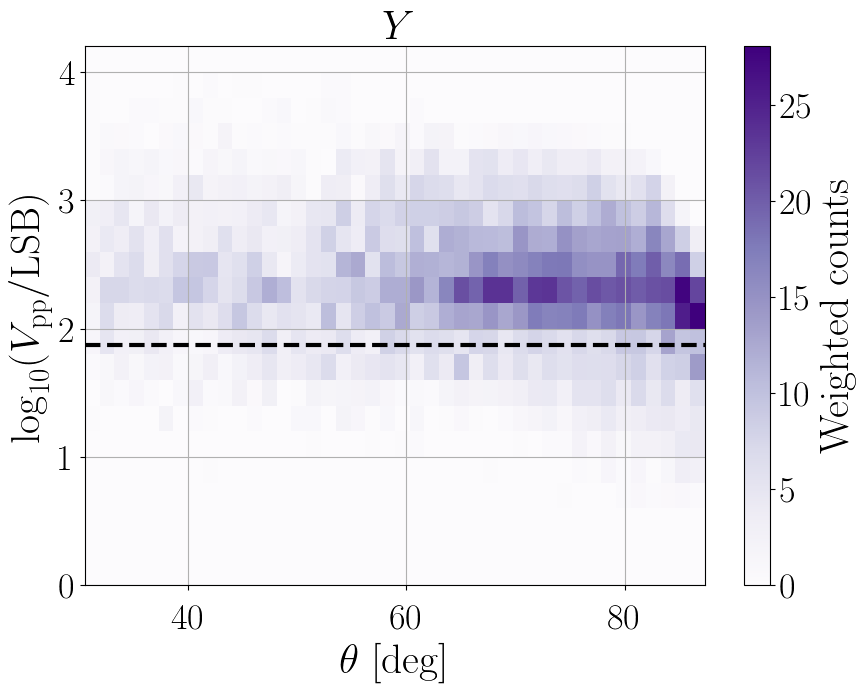

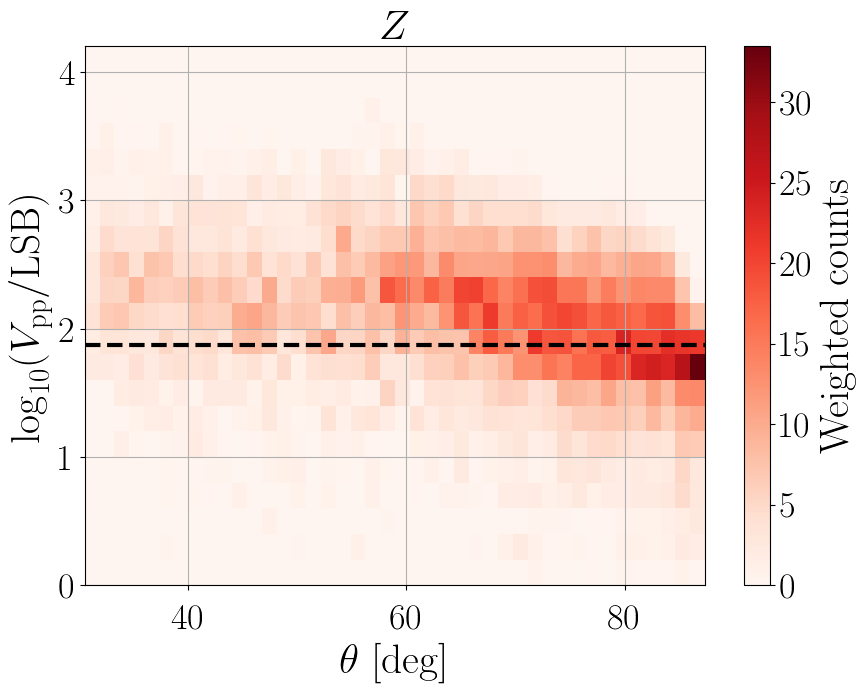

In [32]:
for p2p, label, cmap in zip(peak_to_peak.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(zenith,
                       np.log10(p2p),
                       bins=[zenith_bin_edges,log_p2p_bin_edges],
                       cmap=cmap,
                       weights=weights_zenith)
    
    ax.axhline(np.log10(75),
               color='k',
               linestyle='--')

    fig.colorbar(hist2d[3], ax=ax, label='Weighted counts')

    ax.set_xlabel(r'$\theta$ [deg]')
    ax.set_ylabel(r'$\log_{10} (V_{\mathrm{pp}} / \mathrm{LSB})$')

    ax.set_title(label)

    ax.grid(True)

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/4133346996.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith,


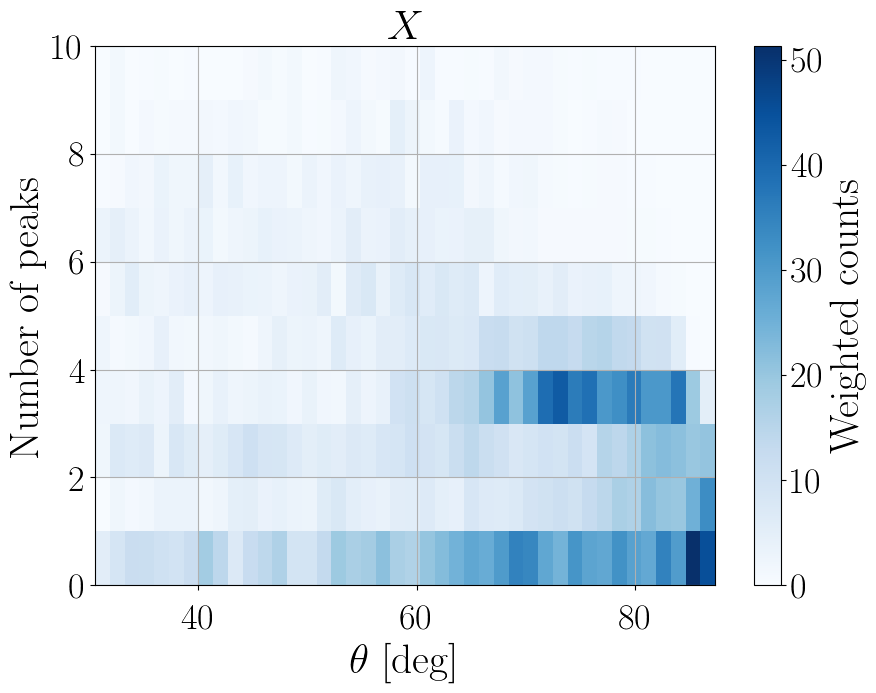

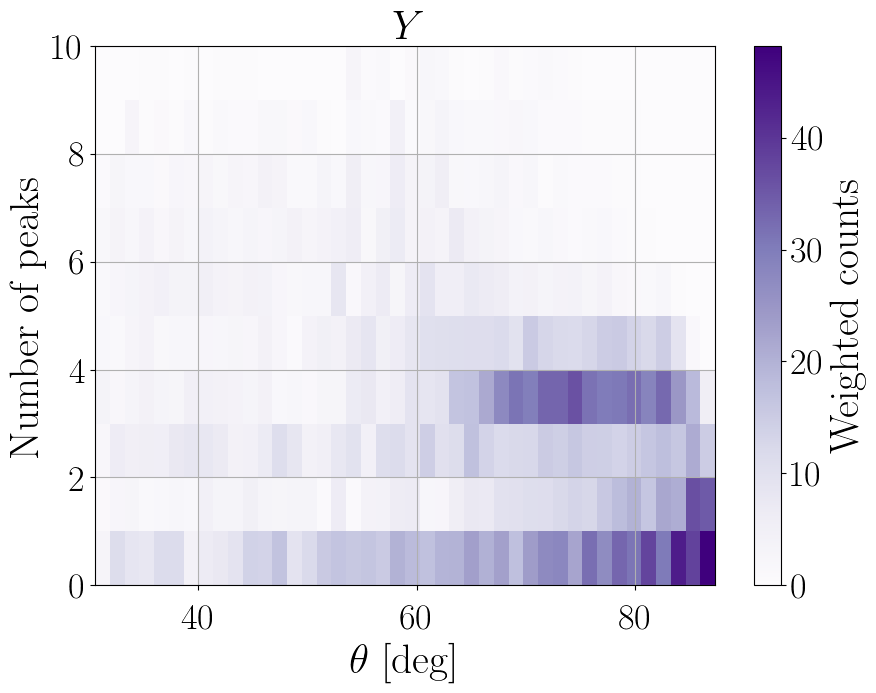

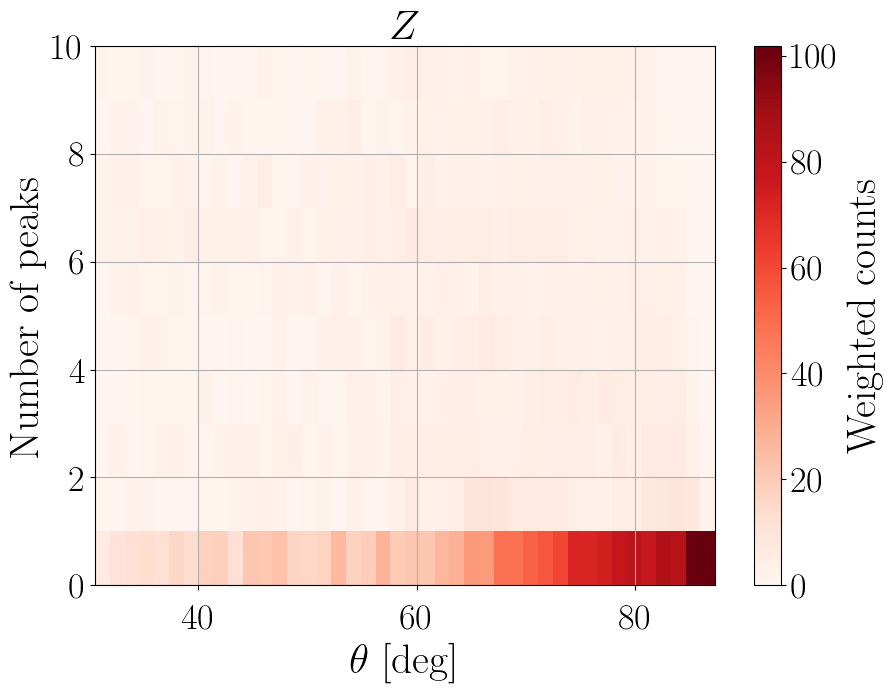

In [33]:
for npeak, label, cmap in zip(n_peaks.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(zenith,
                       npeak,
                       bins=[zenith_bin_edges,n_peaks_bin_edges],
                       weights=weights_zenith,
                       cmap=cmap)

    fig.colorbar(hist2d[3], ax=ax, label='Weighted counts')

    ax.set_ylim([0,10])

    ax.set_xlabel(r'$\theta$ [deg]')
    ax.set_ylabel(r'Number of peaks')

    ax.set_title(label)

    ax.grid()

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/2151417640.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith,


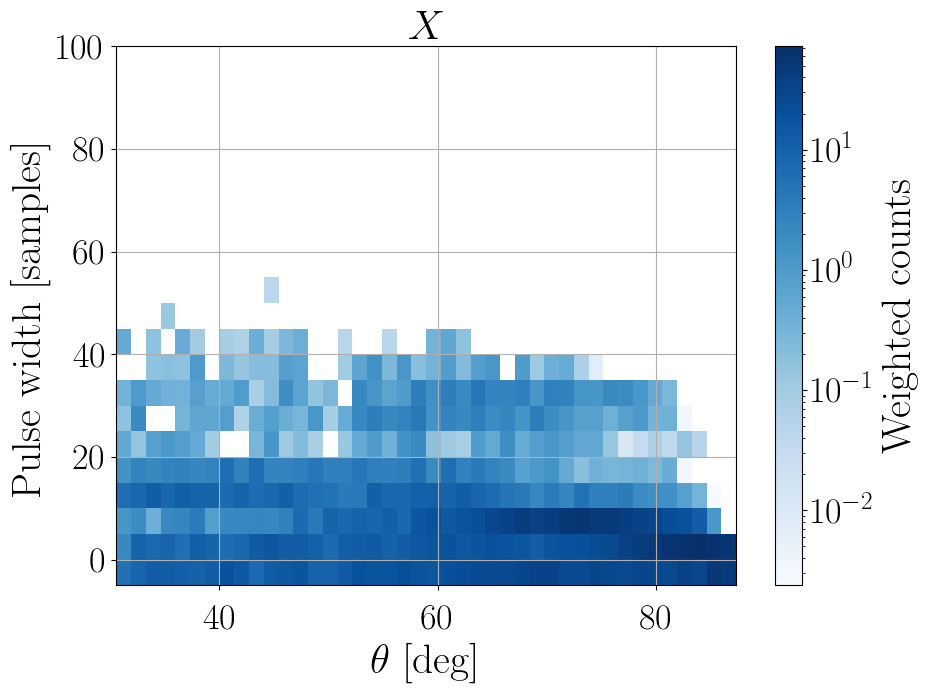

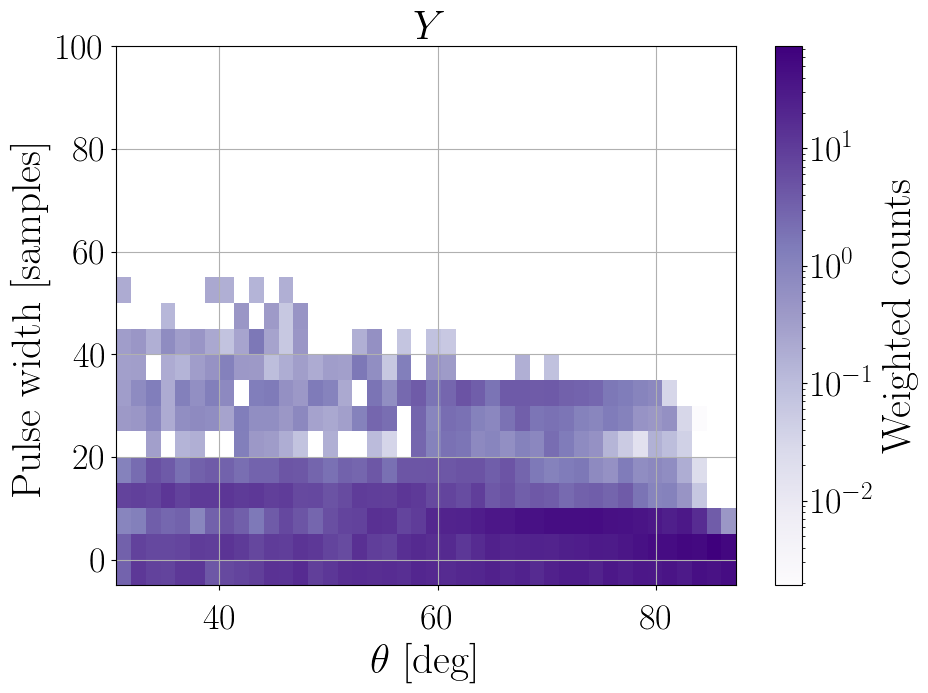

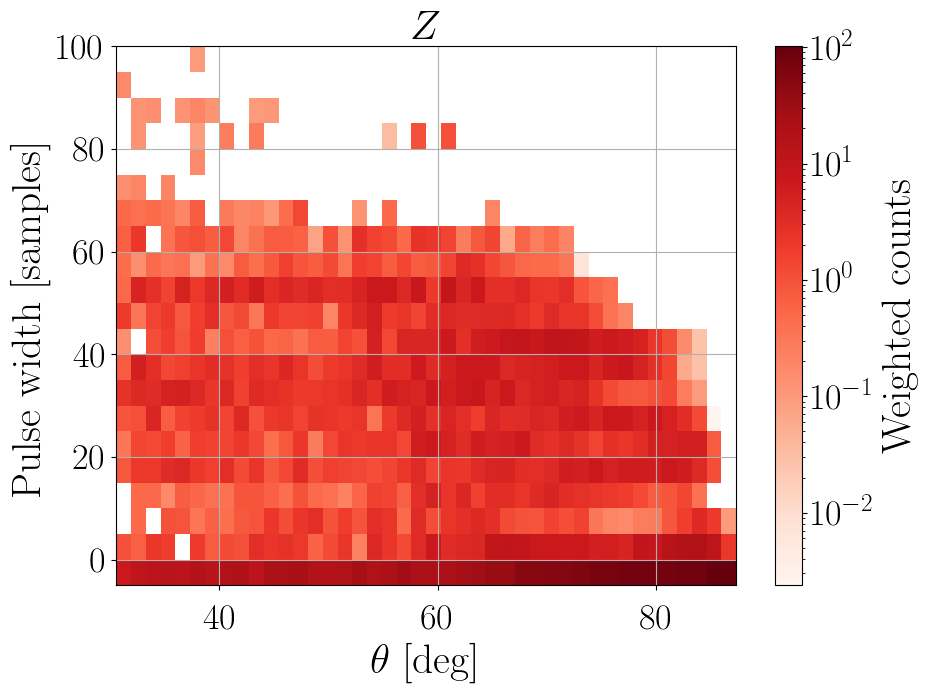

In [34]:
for pw, label, cmap in zip(pulse_width.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(zenith,
                       pw,
                       bins=[zenith_bin_edges,pw_bin_edges],
                       cmap=cmap,
                       weights=weights_zenith,
                       norm=matplotlib.colors.LogNorm())

    fig.colorbar(hist2d[3], ax=ax, label='Weighted counts')

    #ax.set_ylim([-1,40])

    ax.set_xlabel(r'$\theta$ [deg]')
    ax.set_ylabel(r'Pulse width [samples]')

    ax.set_title(label)

    ax.grid()

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/3571975648.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith,


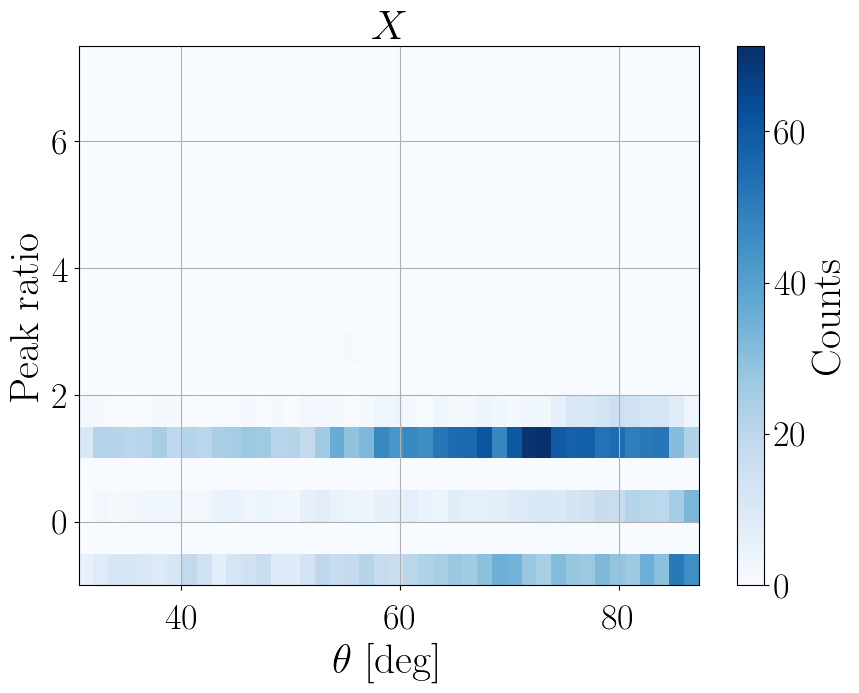

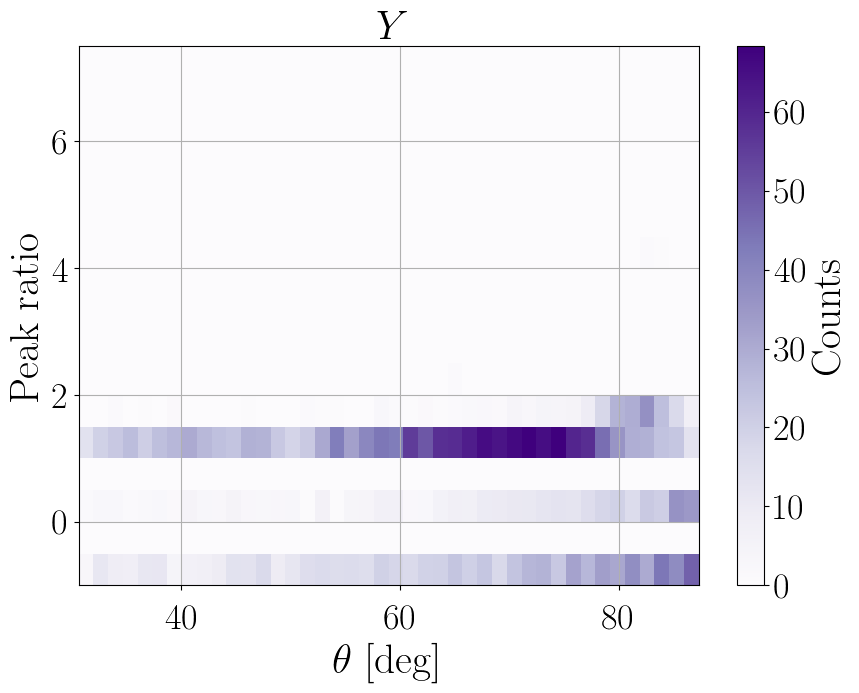

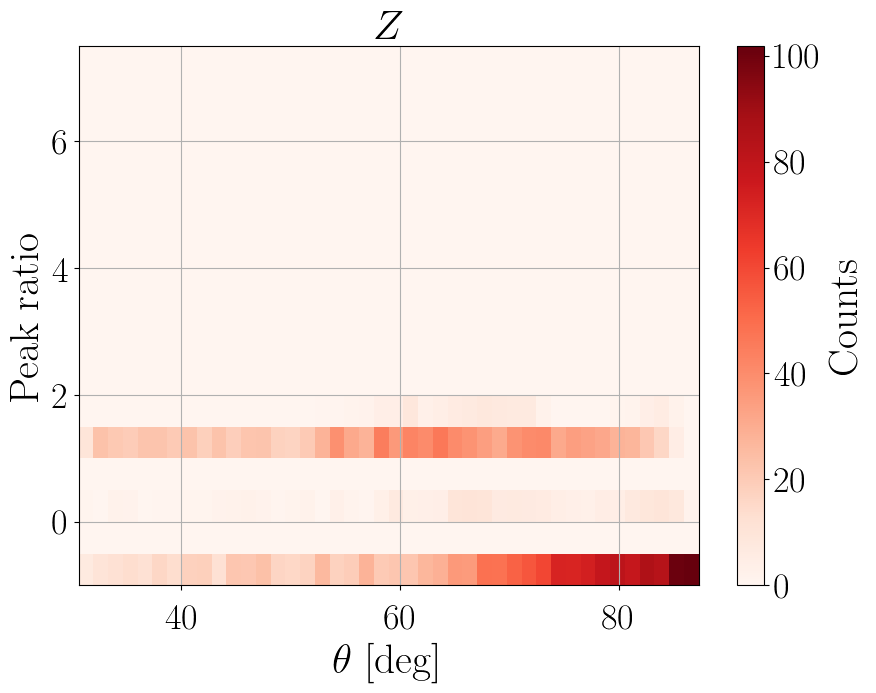

In [35]:
for pr, label, cmap in zip(peak_ratio.T,labels,cmaps):
    fig, ax = plt.subplots()
    
    hist2d = ax.hist2d(zenith,
                       pr,
                       bins=[zenith_bin_edges,pr_bin_edges],
                       cmap=cmap,
                       weights=weights_zenith,)

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlabel(r'$\theta$ [deg]')
    ax.set_ylabel(r'Peak ratio')

    ax.set_title(label)

    ax.grid()

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/881346962.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(zenith,


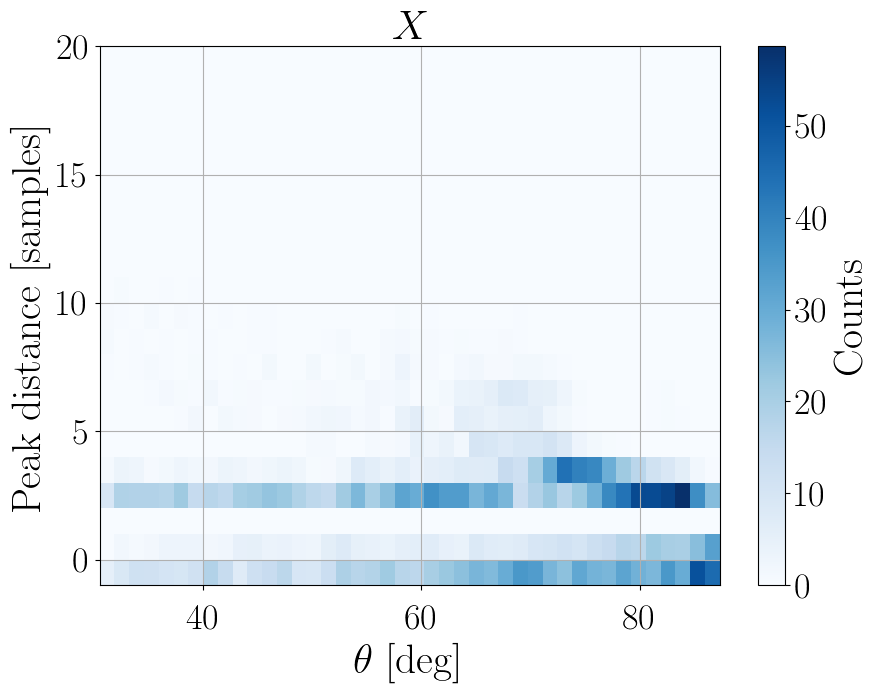

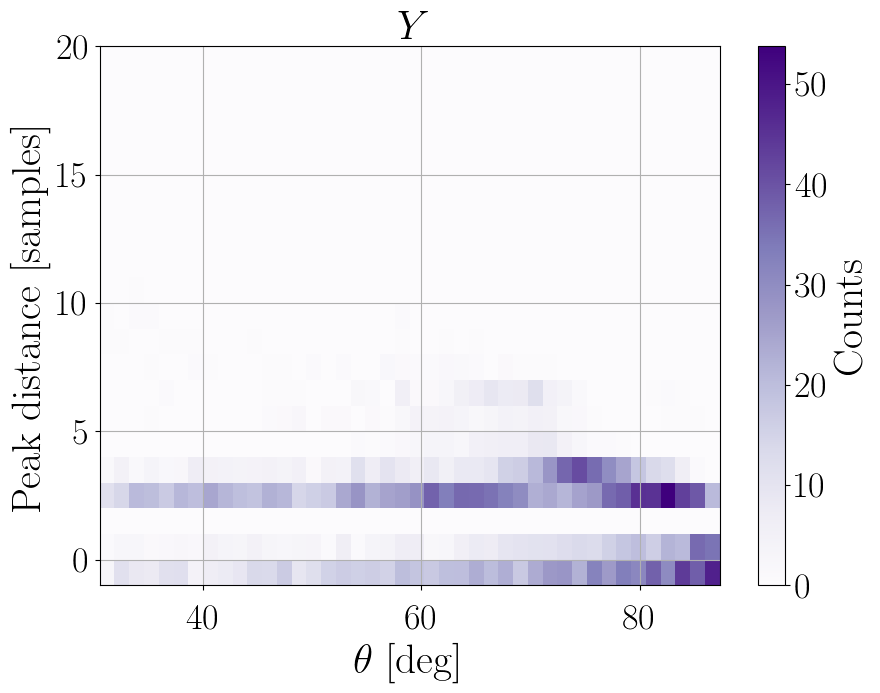

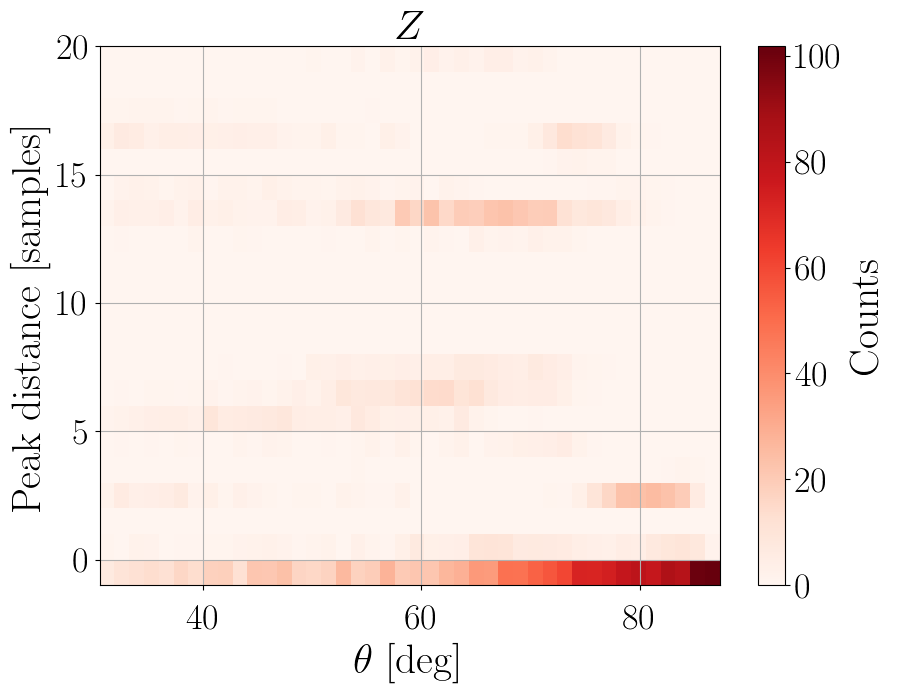

In [36]:
for pd, label, cmap in zip(peak_dist.T,labels,cmaps):
    fig, ax = plt.subplots()
    
    hist2d = ax.hist2d(zenith,
                       pd,
                       bins=[zenith_bin_edges,pd_bin_edges],
                       cmap=cmap,
                       weights=weights_zenith,)

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlabel(r'$\theta$ [deg]')
    ax.set_ylabel(r'Peak distance [samples]')

    ax.set_title(label)

    ax.grid()

    plt.show()

### As function of $\omega$

/scratch/users/p/pcorrea/ipykernel_16842/1350784634.py:5: RuntimeWarning: divide by zero encountered in log10
  np.log10(p2p),
/scratch/users/p/pcorrea/ipykernel_16842/1350784634.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(omega,


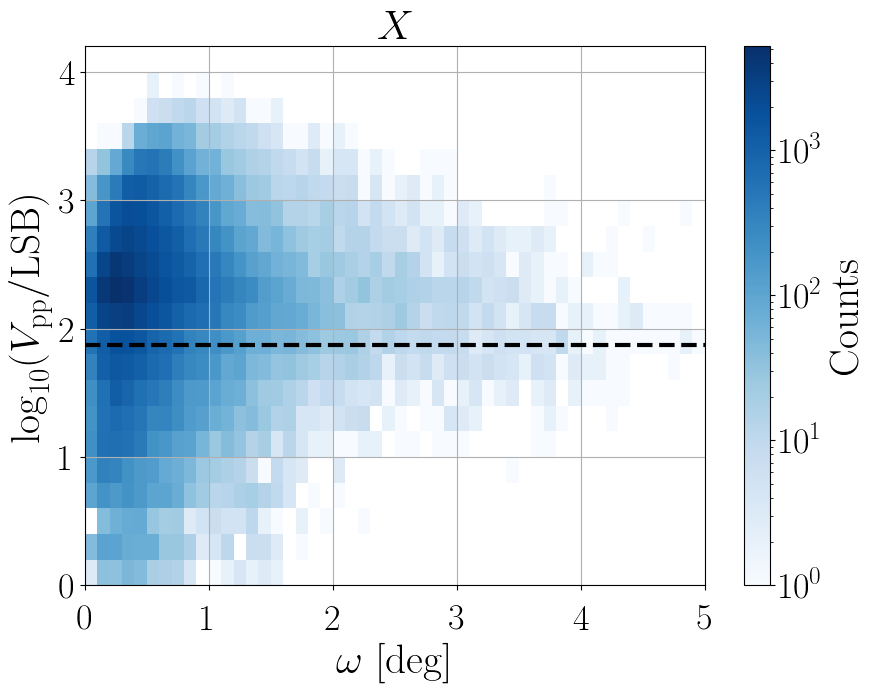

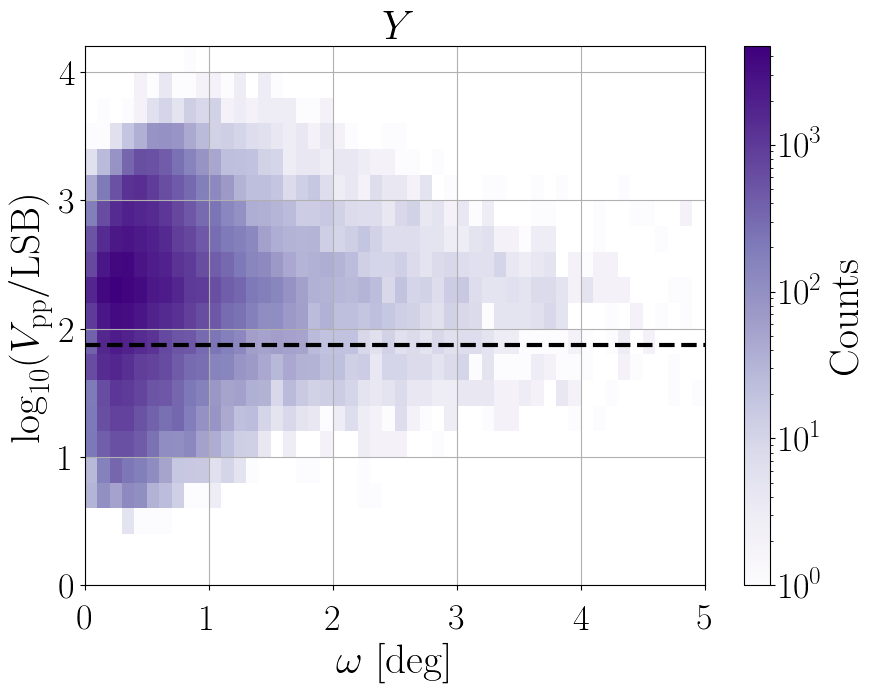

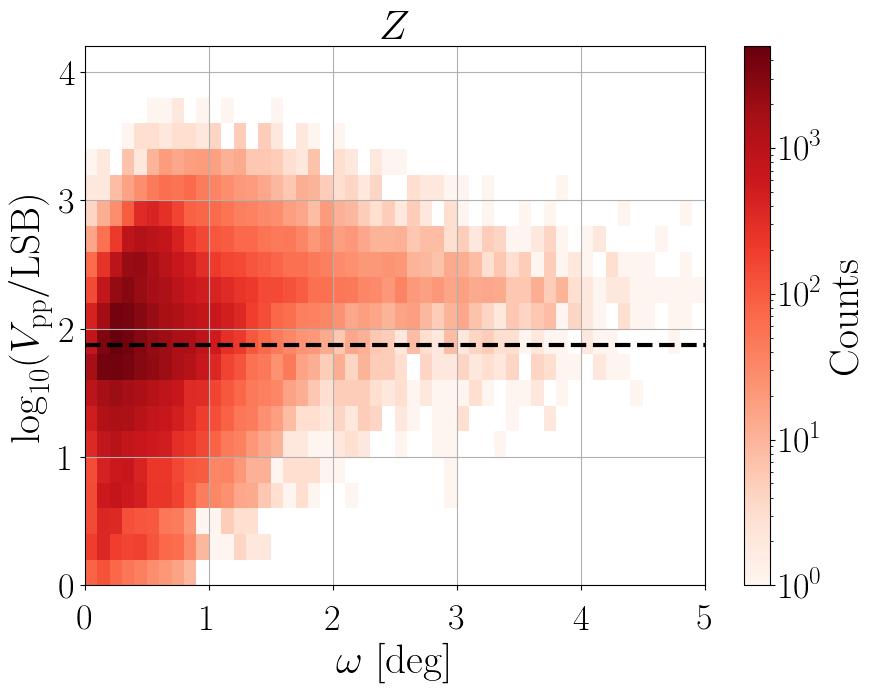

In [37]:
for p2p, label, cmap in zip(peak_to_peak.T,labels,cmaps):
    fig, ax = plt.subplots()
    
    hist2d = ax.hist2d(omega,
                       np.log10(p2p),
                       bins=[omega_bin_edges,log_p2p_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.axhline(np.log10(75),
               color='k',
               linestyle='--')
    
    ax.set_xlim([0,5])

    ax.set_xlabel(r'$\omega$ [deg]')
    ax.set_ylabel(r'$\log_{10} (V_{\mathrm{pp}} / \mathrm{LSB})$')

    ax.set_title(label)

    ax.grid(True)

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/4013535597.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(omega,


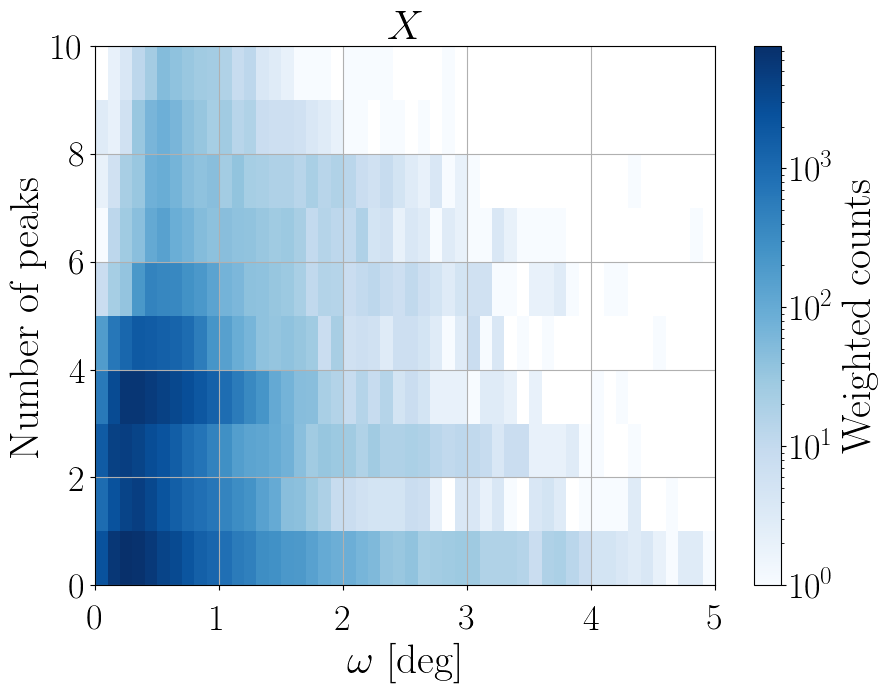

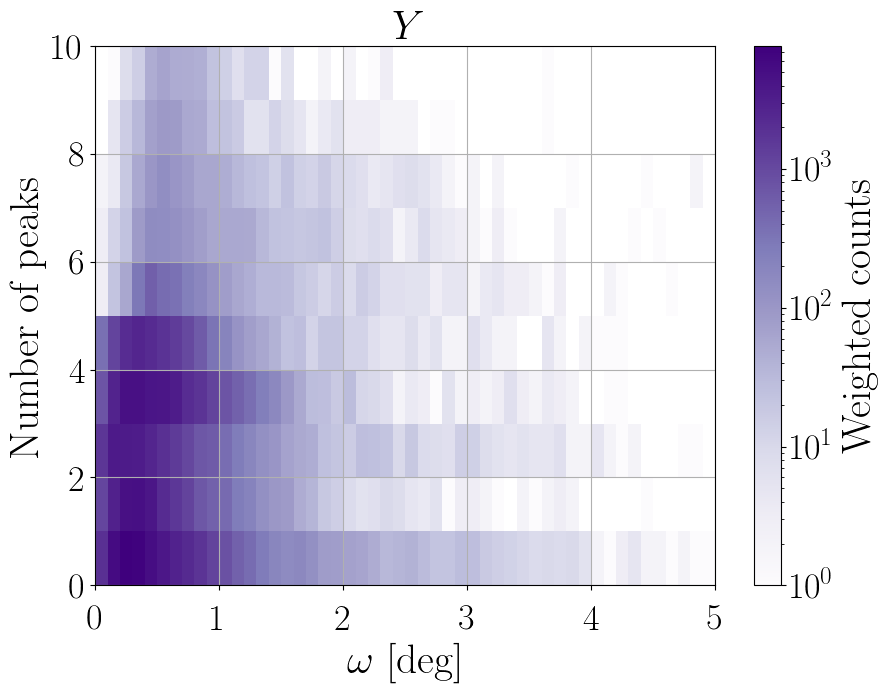

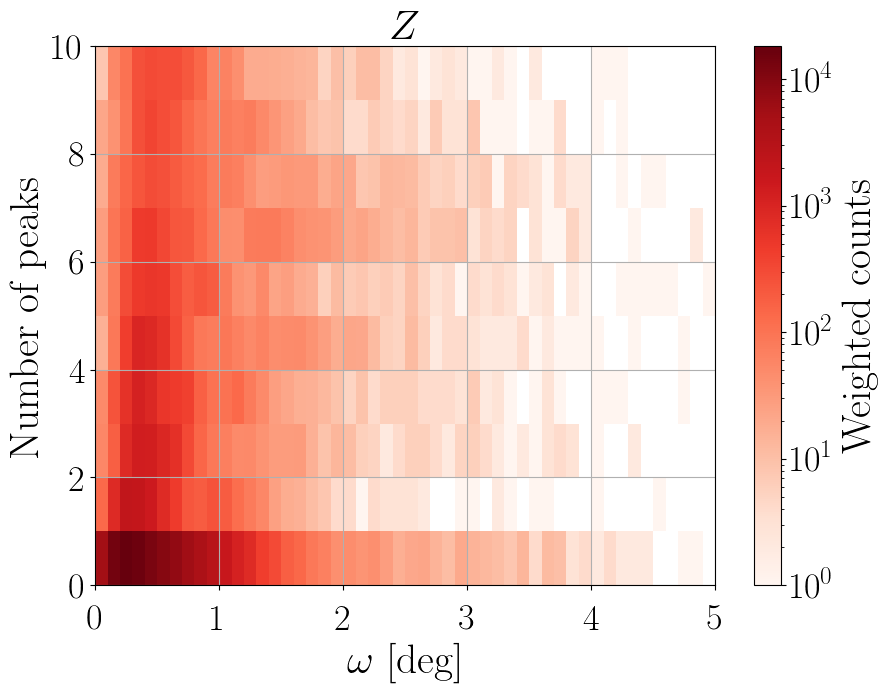

In [38]:
for npeak, label, cmap in zip(n_peaks.T,labels,cmaps):
    fig, ax = plt.subplots()

    hist2d = ax.hist2d(omega,
                       npeak,
                       bins=[omega_bin_edges,n_peaks_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())

    fig.colorbar(hist2d[3], ax=ax, label='Weighted counts')

    ax.set_xlim([0,5])
    ax.set_ylim([0,10])

    ax.set_xlabel(r'$\omega$ [deg]')
    ax.set_ylabel(r'Number of peaks')

    ax.set_title(label)

    ax.grid()

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/4019439412.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(omega,


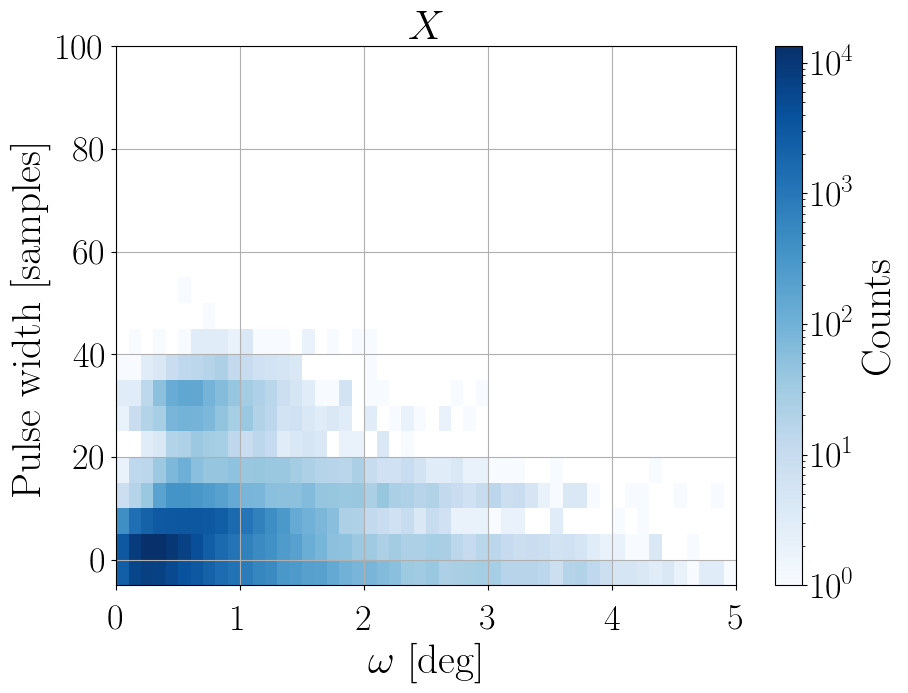

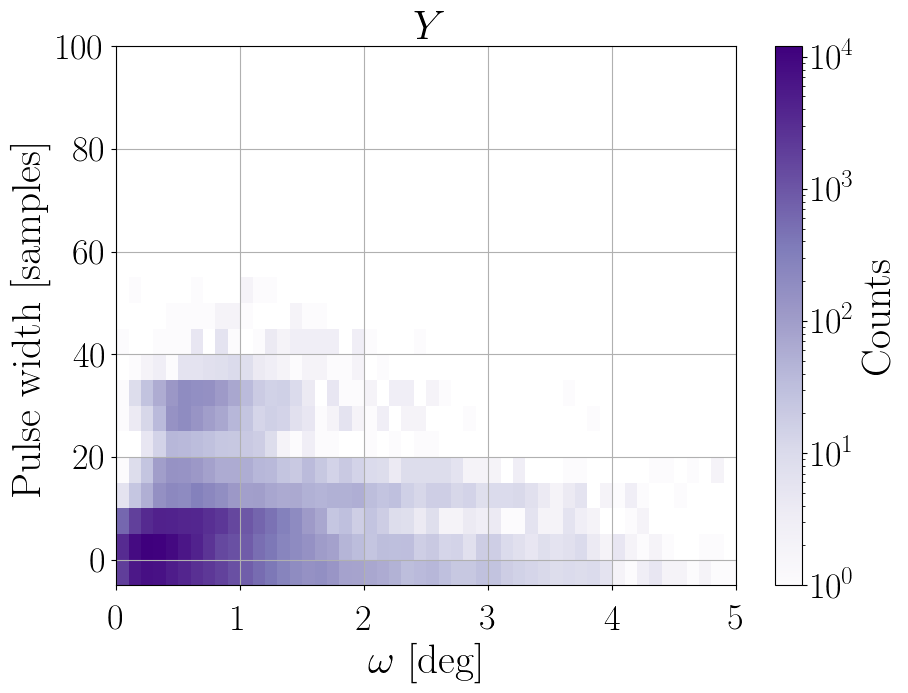

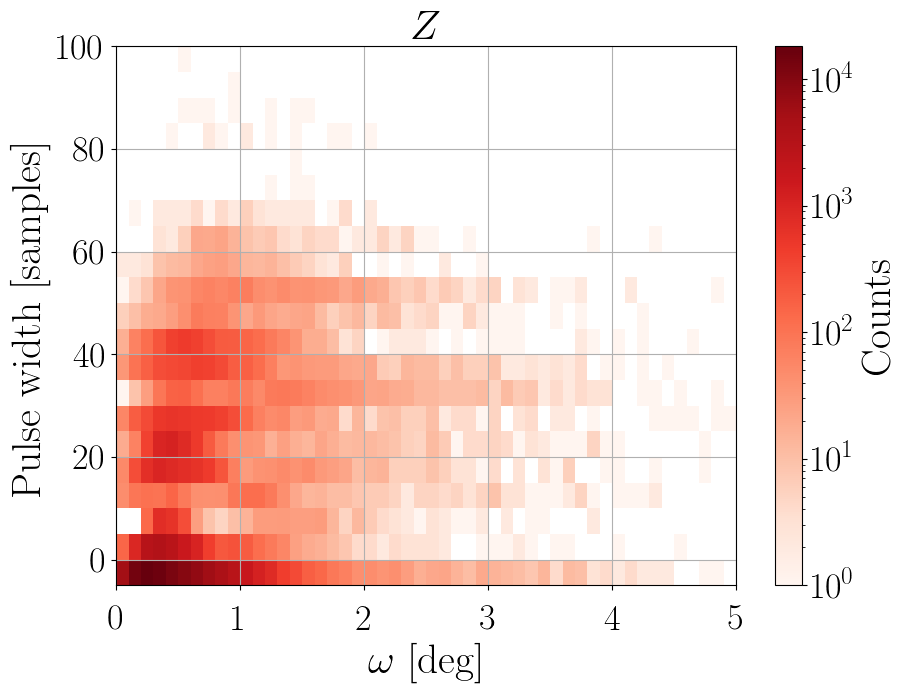

In [46]:
for pw, label, cmap in zip(pulse_width.T,labels,cmaps):
    fig, ax = plt.subplots()
    
    hist2d = ax.hist2d(omega,
                       pw,
                       bins=[omega_bin_edges,pw_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlim([0,5])
    #ax.set_ylim([0,40])

    ax.set_xlabel(r'$\omega$ [deg]')
    ax.set_ylabel(r'Pulse width [samples]')

    ax.set_title(label)

    ax.grid(True)

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/967660899.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(omega,


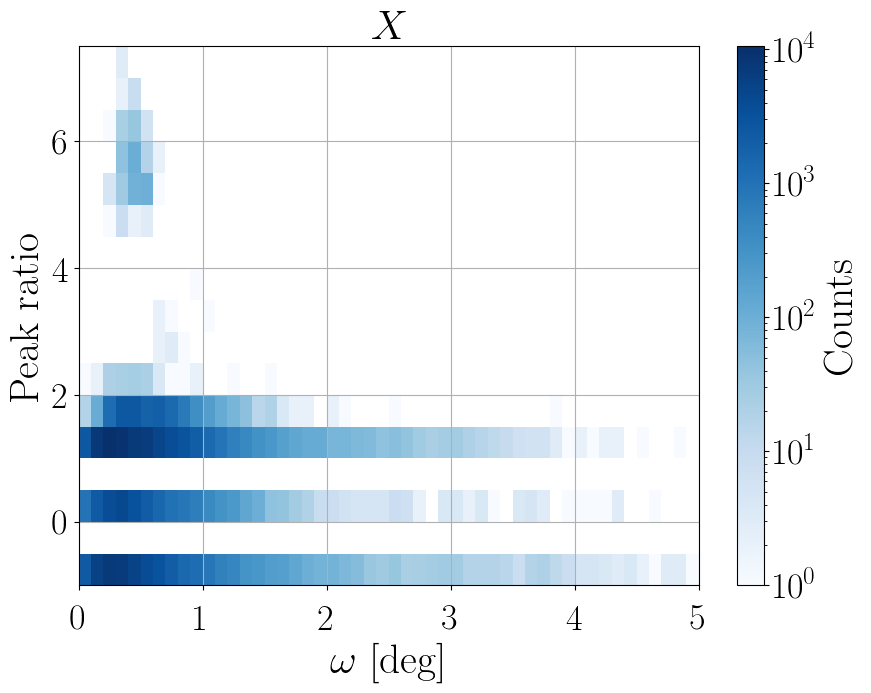

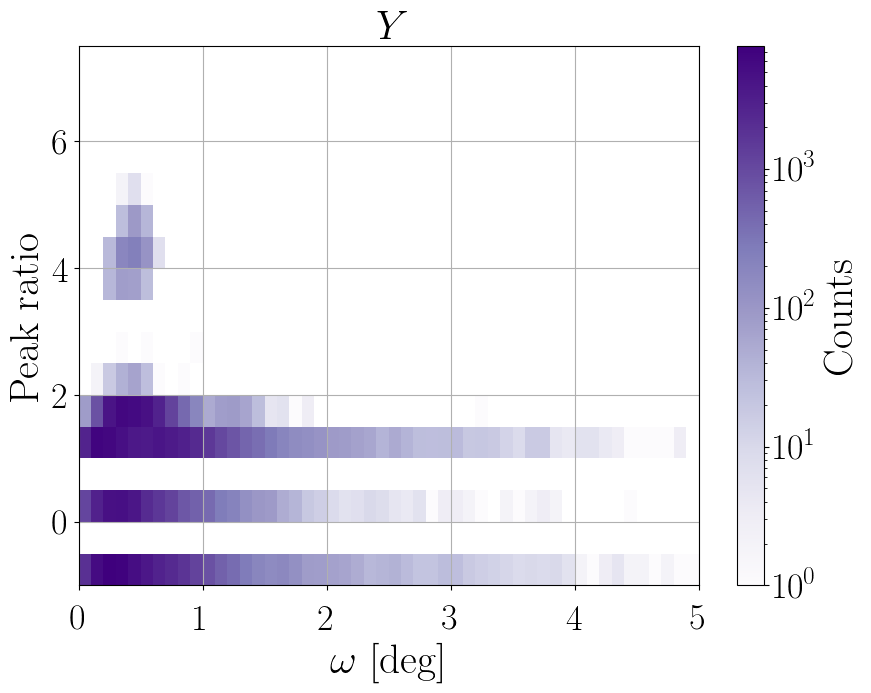

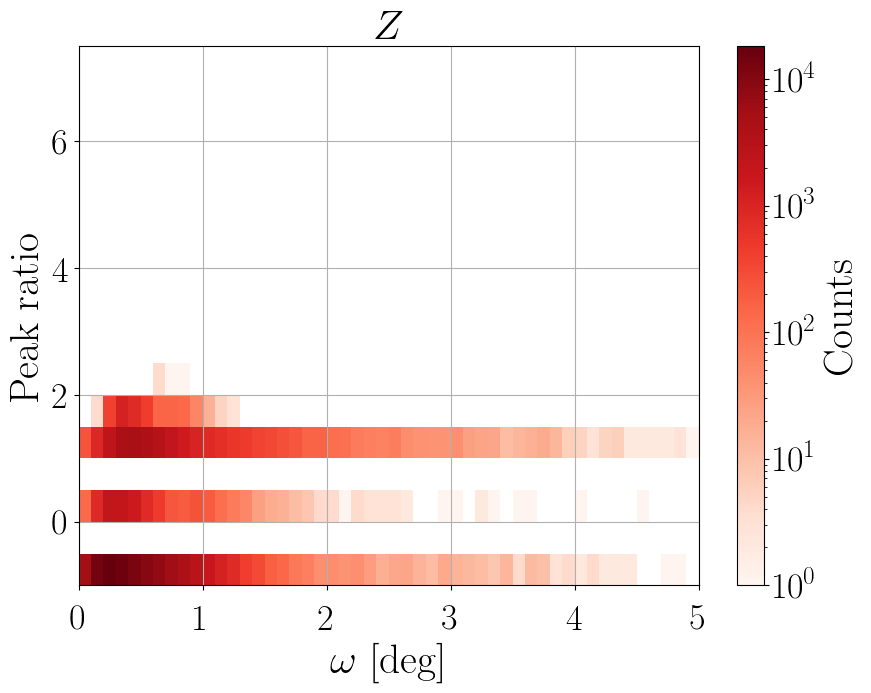

In [40]:
for pr, label, cmap in zip(peak_ratio.T,labels,cmaps):
    fig, ax = plt.subplots()
    
    hist2d = ax.hist2d(omega,
                       pr,
                       bins=[omega_bin_edges,pr_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlim([0,5])

    ax.set_xlabel(r'$\omega$ [deg]')
    ax.set_ylabel(r'Peak ratio')

    ax.set_title(label)

    ax.grid(True)

    plt.show()

/scratch/users/p/pcorrea/ipykernel_16842/2887501773.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist2d = ax.hist2d(omega,


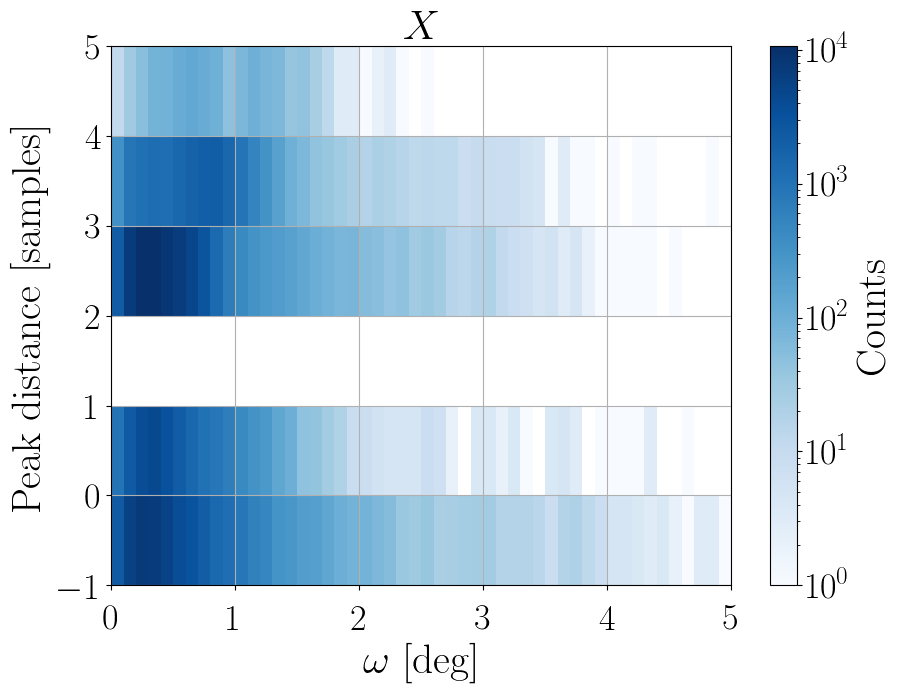

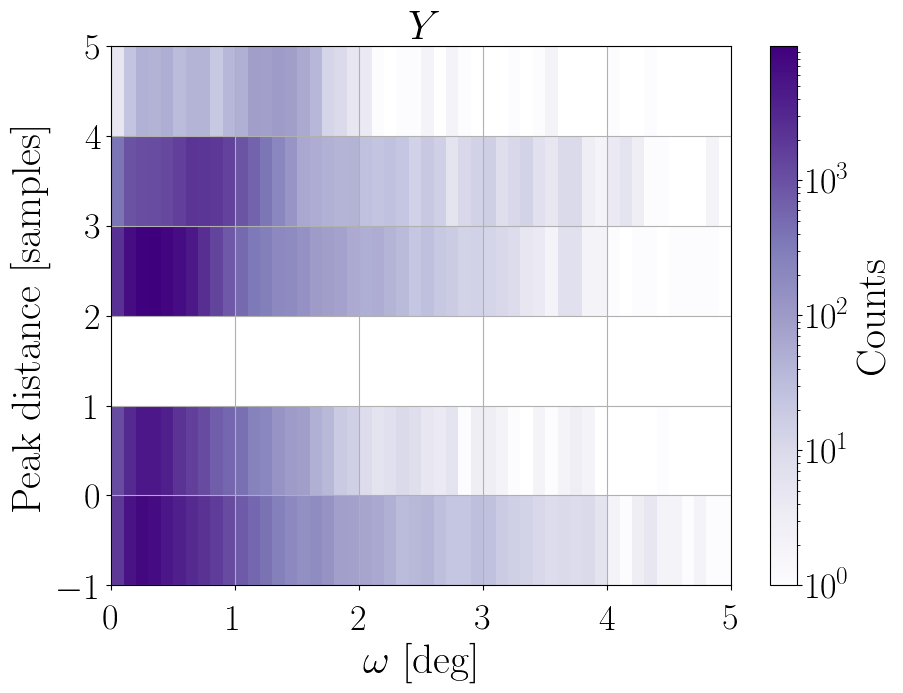

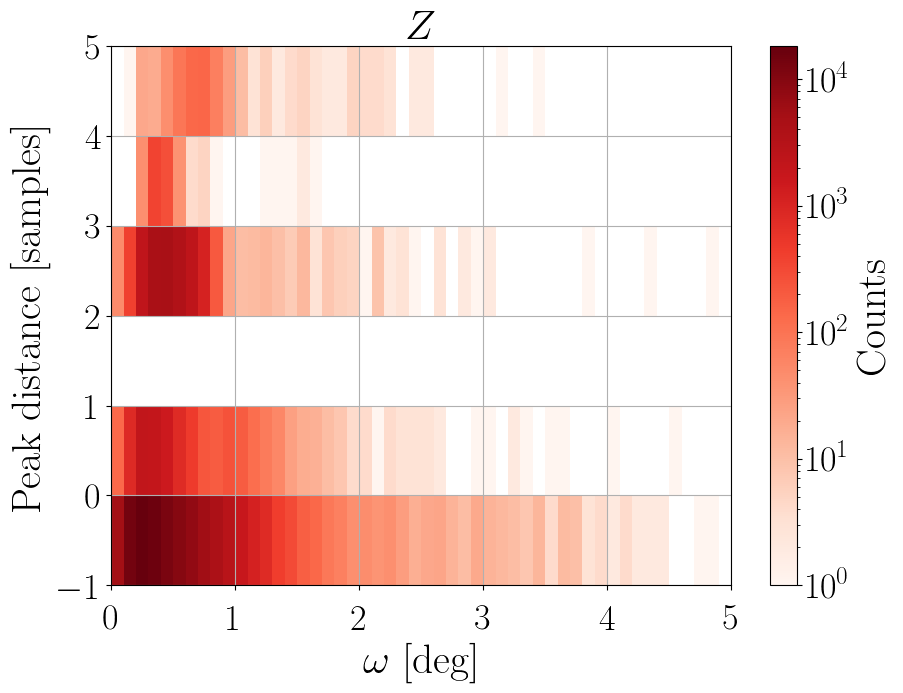

In [41]:
for pd, label, cmap in zip(peak_dist.T,labels,cmaps):
    fig, ax = plt.subplots()
    
    hist2d = ax.hist2d(omega,
                       pd,
                       bins=[omega_bin_edges,pd_bin_edges],
                       cmap=cmap,
                       norm=matplotlib.colors.LogNorm())

    fig.colorbar(hist2d[3], ax=ax, label='Counts')

    ax.set_xlim([0,5])
    ax.set_ylim([-1,5])

    ax.set_xlabel(r'$\omega$ [deg]')
    ax.set_ylabel(r'Peak distance [samples]')

    ax.set_title(label)

    ax.grid()

    plt.show()